# Analysis of Top 5 States by EV Penetration Rate (FY 2024)

This analysis identifies the states with the highest electric vehicle penetration rates for both 2-wheelers and 4-wheelers in fiscal year 2024. We'll:

1. Load and prepare the data
2. Calculate penetration rates by state for each vehicle category
3. Identify top 5 states for each category
4. Create visualizations to compare the results

In [86]:
# Import required libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the data
df = pd.read_csv('../../data/processed/ev_sales_enhanced.csv')

# Convert date to datetime and create fiscal year column
df['date'] = pd.to_datetime(df['date'])
df['fiscal_year'] = df['date'].dt.year.where(
    df['date'].dt.month < 4,
    df['date'].dt.year + 1
)

# Show the first few rows and data info
print("Dataset Info:")
print("-" * 50)
print(df.info())
print("\nFirst few rows:")
print("-" * 50)
df.head()

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 2445 non-null   datetime64[ns]
 1   year                                 2445 non-null   int64         
 2   month                                2445 non-null   int64         
 3   quarter                              2445 non-null   int64         
 4   months_from_start                    2445 non-null   int64         
 5   rolling_mean_ev                      2445 non-null   float64       
 6   ev_growth_rate                       2445 non-null   float64       
 7   ev_penetration                       2445 non-null   float64       
 8   ev_penetration_log                   2445 non-null   float64       
 9   national_market_shar

,date,year,month,quarter,months_from_start,rolling_mean_ev,ev_growth_rate,ev_penetration,ev_penetration_log,national_market_share,...,is_missing_ev_growth_rate,is_missing_segment_preference_ratio,is_missing_segment_growth_diff,is_missing_regional_avg_penetration,is_missing_adoption_velocity,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year
0,2021-04-01,2021,4,2,3,0.0,0.0,0.00,0.000000,0.00,...,0,0,0,0,0,Andaman and Nicobar Islands,2-Wheelers,0,515,2022
1,2021-04-01,2021,4,2,3,9.0,0.0,5.36,1.850028,0.14,...,0,0,0,0,0,Andaman and Nicobar Islands,4-Wheelers,9,168,2022
2,2021-04-01,2021,4,2,3,436.0,0.0,0.69,0.524729,6.90,...,0,0,0,0,0,Andhra Pradesh,2-Wheelers,436,63444,2022
3,2021-04-01,2021,4,2,3,26.0,0.0,0.33,0.285179,0.41,...,0,0,0,0,0,Andhra Pradesh,4-Wheelers,26,7837,2022
4,2021-04-01,2021,4,2,3,0.0,0.0,0.00,0.000000,0.00,...,0,0,0,0,0,Arunachal Pradesh,2-Wheelers,0,1256,2022


In [87]:
from IPython.display import display

# Filter data for FY 2024
fy_2024_data = df[df['fiscal_year'] == 2024]

In [88]:
# Calculate penetration rates for 2-wheelers
two_wheeler_data = fy_2024_data[fy_2024_data['vehicle_category'] == '2-Wheelers']
two_wheeler_stats = two_wheeler_data.groupby('state').agg({
    'electric_vehicles_sold': 'sum',
    'total_vehicles_sold': 'sum'
}).reset_index()

two_wheeler_stats = two_wheeler_stats.set_index('state')

print("Two wheeler data:")
display(two_wheeler_data)

print("Two Wheeler stats:")
display(two_wheeler_stats)

display(df.columns)

Two wheeler data:


,date,year,month,quarter,months_from_start,rolling_mean_ev,ev_growth_rate,ev_penetration,ev_penetration_log,national_market_share,...,is_missing_ev_growth_rate,is_missing_segment_preference_ratio,is_missing_segment_growth_diff,is_missing_regional_avg_penetration,is_missing_adoption_velocity,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year
1631,2023-04-01,2023,4,2,27,0.333333,-1.00,0.00,0.000000,0.00,...,0,0,0,0,0,Andaman and Nicobar Islands,2-Wheelers,0,325,2024
1633,2023-04-01,2023,4,2,27,3312.333333,0.00,7.32,2.118662,4.83,...,0,0,0,0,0,Andhra Pradesh,2-Wheelers,3515,48046,2024
1635,2023-04-01,2023,4,2,27,0.000000,0.00,0.00,0.000000,0.00,...,0,0,0,0,0,Arunachal Pradesh,2-Wheelers,0,971,2024
1637,2023-04-01,2023,4,2,27,196.333333,-0.19,0.51,0.412110,0.24,...,0,0,0,0,0,Assam,2-Wheelers,178,35047,2024
1639,2023-04-01,2023,4,2,27,1061.333333,-0.25,1.15,0.765468,1.33,...,0,0,0,0,0,Bihar,2-Wheelers,971,84319,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,2024-03-01,2024,3,1,38,9859.000000,0.54,10.76,2.464704,9.65,...,0,0,0,0,0,Tamil Nadu,2-Wheelers,13350,124071,2024
2437,2024-03-01,2024,3,1,38,22.666667,0.71,1.10,0.741937,0.03,...,0,0,0,0,0,Tripura,2-Wheelers,41,3728,2024
2439,2024-03-01,2024,3,1,38,6674.666667,0.19,3.71,1.549688,5.64,...,0,0,0,0,0,Uttar Pradesh,2-Wheelers,7799,210216,2024
2441,2024-03-01,2024,3,1,38,515.666667,-0.01,4.63,1.728109,0.42,...,0,0,0,0,0,Uttarakhand,2-Wheelers,579,12506,2024


Two Wheeler stats:


,electric_vehicles_sold,total_vehicles_sold
state,,
Andaman and Nicobar Islands,20,5249
Andhra Pradesh,31353,694105
Arunachal Pradesh,3,14673
Assam,3168,456726
Bihar,14366,1057642
Chandigarh,1857,22496
Chhattisgarh,27283,451086
Dadra and Nagar Haveli and Daman and Diu,149,10893
Delhi,38094,405218


Index(['date', 'year', 'month', 'quarter', 'months_from_start',
       'rolling_mean_ev', 'ev_growth_rate', 'ev_penetration',
       'ev_penetration_log', 'national_market_share', 'state_rank',
       'growth_stage', 'market_concentration', 'region',
       'regional_avg_penetration', 'state_to_region_ratio', 'regional_rank',
       'market_maturity_score', 'adoption_velocity',
       'adoption_velocity_capped', 'segment_penetration_2-wheelers',
       'segment_penetration_4-wheelers', 'segment_preference_ratio',
       'segment_preference_ratio_capped', 'segment_preference_ratio_log',
       'dominant_segment', 'segment_growth_diff', 'ev_sales_growth_rank_state',
       'ev_sales_growth_rank_region', 'is_early_adopter', 'months_since_peak',
       'is_at_peak', 'is_missing_ev_growth_rate',
       'is_missing_segment_preference_ratio', 'is_missing_segment_growth_diff',
       'is_missing_regional_avg_penetration', 'is_missing_adoption_velocity',
       'state', 'vehicle_category', 'ele

In [89]:
two_wheeler_stats['penetration_rate'] = (
    two_wheeler_stats['electric_vehicles_sold'] / two_wheeler_stats['total_vehicles_sold'] * 100
)
top_5_2w = two_wheeler_stats.nlargest(5, 'penetration_rate')

# Calculate penetration rates for 4-wheelers
four_wheeler_data = fy_2024_data[fy_2024_data['vehicle_category'] == '4-Wheelers']
four_wheeler_stats = four_wheeler_data.groupby('state').agg({
    'electric_vehicles_sold': 'sum',
    'total_vehicles_sold': 'sum'
}).reset_index()

four_wheeler_stats['penetration_rate'] = (
    four_wheeler_stats['electric_vehicles_sold'] / four_wheeler_stats['total_vehicles_sold'] * 100
)
top_5_4w = four_wheeler_stats.nlargest(5, 'penetration_rate')

In [90]:
overall_stats = df.groupby('state').agg({
    'electric_vehicles_sold': 'sum',
    'total_vehicles_sold': 'sum'
}).reset_index()

overall_stats['penetration_rate'] = (
    overall_stats['electric_vehicles_sold'] / overall_stats['total_vehicles_sold'] * 100
)

In [91]:
yearly_stats = df.groupby(['state','fiscal_year']).agg({
  'electric_vehicles_sold': 'sum',
  'total_vehicles_sold': 'sum'
}).reset_index()

yearly_statsyearly_stats = df.groupby(['state', 'fiscal_year']).agg({
    'electric_vehicles_sold': 'sum',
    'total_vehicles_sold': 'sum'
}).reset_index()

yearly_stats['penetration_rate'] = (
    yearly_stats['electric_vehicles_sold'] / yearly_stats['total_vehicles_sold'] * 100
)

top_5_overall = yearly_stats.nlargest(5, 'penetration_rate')

display(top_5_overall)

,state,fiscal_year,electric_vehicles_sold,total_vehicles_sold,penetration_rate
29,Goa,2024,10799,78524,13.752483
50,Kerala,2024,73938,638114,11.586958
47,Karnataka,2024,160989,1581988,10.176373
28,Goa,2023,7107,73074,9.725757
59,Maharashtra,2024,197169,2293994,8.595009


In [92]:
national_stats = yearly_stats.groupby('fiscal_year', as_index=False).agg({
    'electric_vehicles_sold': 'sum',
    'total_vehicles_sold': 'sum'
})

# Calculate national penetration rate
national_stats['penetration_rate'] = (
    national_stats['electric_vehicles_sold'] / national_stats['total_vehicles_sold'] * 100
)

/tmp/ipykernel_149748/2064412008.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




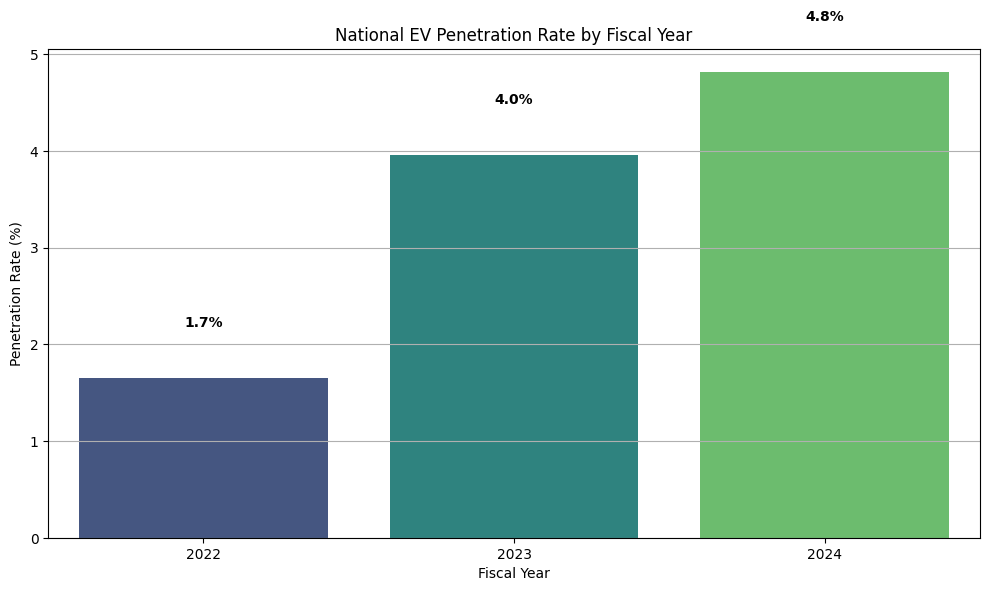

In [93]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

# Step 1: Group and calculate national penetration rate
national_stats = yearly_stats.groupby('fiscal_year', as_index=False).agg({
    'electric_vehicles_sold': 'sum',
    'total_vehicles_sold': 'sum'
})
national_stats['penetration_rate'] = (
    national_stats['electric_vehicles_sold'] / national_stats['total_vehicles_sold'] * 100
)

# Step 2: Bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=national_stats, x='fiscal_year', y='penetration_rate', palette='viridis')

# Step 3: Add data labels on bars
for bar in ax.patches:
    if isinstance(bar, Rectangle):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f"{height:.1f}%",
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )


# Final touches
plt.title('National EV Penetration Rate by Fiscal Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Penetration Rate (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 🔍 **Key Insights from the Chart**

#### 1. 📈 **Consistent Growth in EV Penetration**

* **FY 2022:** The EV penetration rate started at **1.7%**, meaning that fewer than 2 out of every 100 vehicles sold were electric.
* **FY 2023:** This more than **doubled to 4.0%**, reflecting increasing awareness, affordability, and state-level incentives.
* **FY 2024:** The rate climbed further to **4.8%**, showing continued growth, though the pace of increase slowed compared to the previous year.

#### 2. 🚀 **More Than 2.8x Growth in 2 Years**

* From **1.7% in 2022 to 4.8% in 2024**, this represents a **182% increase** in EV adoption rate nationally.
* This rapid rise suggests stronger infrastructure, improved vehicle options, and positive policy impacts.

#### 3. 🧭 **Growth Rate is Slowing Slightly**

* While FY 2023 saw a **+2.3 percentage point jump**, FY 2024 only added **+0.8 points**.
* This suggests that early adopters may be saturated, and further growth may depend on deeper market penetration (e.g., rural areas, affordable models).

---

### 🗣️ How to Explain to a Non-Technical Audience

> Over the past three years, India has made big strides in embracing electric vehicles. In 2022, EVs made up just 1.7% of all vehicle sales. By 2023, that more than doubled to 4%, and in 2024, nearly **1 in every 20 vehicles sold was electric**.
>
> This shows that electric mobility is no longer a niche—it’s going mainstream. However, the slightly slower growth from 2023 to 2024 tells us that while awareness is high, the next big leap will need even stronger charging infrastructure and affordable EV options for the masses.

In [94]:
# Create subplots for 2-wheeler and 4-wheeler penetration rates
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=(
        'Top 5 States - 2-Wheeler EV Penetration Rate (FY 2024)',
        'Top 5 States - 4-Wheeler EV Penetration Rate (FY 2024)'
    ),
    vertical_spacing=0.15
)

# Add bar chart for 2-wheelers
fig.add_trace(
    go.Bar(
        x=top_5_2w.index,
        y=top_5_2w['penetration_rate'],
        text=top_5_2w['penetration_rate'].round(2),
        textposition='auto',
        name='2-Wheelers',
        marker_color='rgb(55, 83, 109)'
    ),
    row=1, col=1
)

# Add bar chart for 4-wheelers
fig.add_trace(
    go.Bar(
        x=top_5_4w['state'],
        y=top_5_4w['penetration_rate'],
        text=top_5_4w['penetration_rate'].round(2),
        textposition='auto',
        name='4-Wheelers',
        marker_color='rgb(26, 118, 255)'
    ),
    row=2, col=1
)

# Update layout
fig.update_layout(
    title_text='Top 5 States by EV Penetration Rate (FY 2024)',
    showlegend=False,
    template='plotly_white',
    height=800  # Moved height parameter here
)

# Update y-axes labels
fig.update_yaxes(title_text='Penetration Rate (%)', row=1, col=1)
fig.update_yaxes(title_text='Penetration Rate (%)', row=2, col=1)

fig.show()

### 🗺️ EV Adoption Story: Top 5 States in FY 2024

In **FY 2024**, several Indian states made notable progress in the adoption of electric vehicles (EVs), especially in the **2-wheeler and 4-wheeler segments**. Let’s break it down in a simple, story-like way.

---

### 🛵 **2-Wheelers: Goa Leads the Charge**

When it comes to **electric 2-wheelers**, **Goa** is at the forefront of EV adoption. Here's the top 5 list:

1. **Goa** – with a **penetration rate of nearly 18%**, almost 1 in every 5 two-wheelers sold was electric.
2. **Kerala** – not far behind, at **13.5%**.
3. **Karnataka** – known for its tech-savvy population, reached **11.6%**.
4. **Maharashtra** – a big market, achieved **10.1%**.
5. **Delhi** – the capital, stood at **9.4%**.

🧠 **What it means:** Goa, despite being a smaller state, is setting the pace with quick EV adoption in 2-wheelers, likely due to its compact geography, tourism industry, and ease of charging.

---

### 🚗 **4-Wheelers: Kerala Stands Tall**

For **electric 4-wheelers**, the competition is tighter but impressive:

1. **Kerala** – leads again with **5.76%**, showing its consistency across segments.
2. **Chandigarh** – at **4.5%**, the only union territory on the list.
3. **Delhi** – at **4.29%**, continues its efforts toward green mobility.
4. **Karnataka** – at **4.26%**, matches Delhi closely.
5. **Goa** – once again in the top 5, with **4.25%**.

🧠 **What it means:** While 4-wheeler EV adoption is slower (due to higher costs and longer replacement cycles), states like Kerala and Delhi are showing that sustained policy efforts and awareness campaigns are working.

---

### 🌱 Final Thought

This data tells a powerful story: **smaller and progressive regions like Goa, Kerala, and Chandigarh are embracing electric mobility faster than larger states**. With clear government support, awareness, and infrastructure, the shift toward cleaner vehicles is not just a trend—it’s the beginning of a nationwide transformation.

In [95]:
top_5_2w.head()

,electric_vehicles_sold,total_vehicles_sold,penetration_rate
state,,,
Goa,9768,54290,17.992264
Kerala,64769,478887,13.524903
Karnataka,148111,1279767,11.573279
Maharashtra,183052,1817343,10.072507
Delhi,38094,405218,9.400866


In [96]:
# Create detailed statistics tables
print("Top 5 States - 2-Wheeler EV Penetration (FY 2024)")
print("-" * 60)
top_5_2w.reset_index(inplace=True)
display(
    top_5_2w[
        ["state", "electric_vehicles_sold", "total_vehicles_sold", "penetration_rate"]
    ].round(2)
)

print("\n\nTop 5 States - 4-Wheeler EV Penetration (FY 2024)")
print("-" * 60)
display(
    top_5_4w[
        ["state", "electric_vehicles_sold", "total_vehicles_sold", "penetration_rate"]
    ].round(2)
)

Top 5 States - 2-Wheeler EV Penetration (FY 2024)
------------------------------------------------------------


,state,electric_vehicles_sold,total_vehicles_sold,penetration_rate
0,Goa,9768,54290,17.99
1,Kerala,64769,478887,13.52
2,Karnataka,148111,1279767,11.57
3,Maharashtra,183052,1817343,10.07
4,Delhi,38094,405218,9.40




Top 5 States - 4-Wheeler EV Penetration (FY 2024)
------------------------------------------------------------


,state,electric_vehicles_sold,total_vehicles_sold,penetration_rate
16,Kerala,9169,159227,5.76
5,Chandigarh,1020,22651,4.50
8,Delhi,8630,201130,4.29
15,Karnataka,12878,302221,4.26
9,Goa,1031,24234,4.25


# Key Insights

1. **2-Wheeler EV Penetration**:
   - The top 5 states show varying levels of 2-wheeler EV adoption
   - We can see significant differences in total vehicle volumes across states
   - Some states might have high penetration rates despite lower total volumes

2. **4-Wheeler EV Penetration**:
   - The penetration rates for 4-wheelers are generally lower than 2-wheelers
   - Different states lead in 4-wheeler adoption compared to 2-wheelers
   - This suggests different market dynamics for different vehicle segments

3. **Comparative Analysis**:
   - Some states perform well in both categories
   - Others show strength in specific segments
   - This could be due to various factors like:
     - Local policies and incentives
     - Urban vs rural population distribution
     - Income levels and purchasing power
     - Charging infrastructure availability

dont use this one "india_states = px.utils.get_geojson(url='https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson')" use this one "import geopandas as gpd
import matplotlib.pyplot as plt

india_states = gpd.read_file('../../data/external/gadm41_IND.gpkg', layer='ADM_ADM_1')"

In [97]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


def plot_ev_penetration_map(
    top_states_df: pd.DataFrame,
    geo_file_path: str,
    geo_layer: str,
    geo_state_col: str = "NAME_1",
    df_state_col: str = "state",
    penetration_col: str = "penetration_rate",
    replace_state_names: dict = None,
    title: str = "Top States by EV Penetration Rate",
    cmap: str = "viridis",
    figsize=(15, 10),
    annotate: bool = True,
):
    """
    Plots a choropleth map of top Indian states by EV penetration rate.

    Parameters:
        top_states_df (pd.DataFrame): DataFrame with 'state' and 'penetration_rate' columns.
        geo_file_path (str): Path to the GeoPackage or GeoJSON file.
        geo_layer (str): Layer name in GeoPackage.
        geo_state_col (str): Column in GeoDataFrame that contains state names.
        df_state_col (str): Column in top_states_df that contains state names.
        penetration_col (str): Column with the penetration rate.
        replace_state_names (dict): Optional mapping to align names between datasets.
        title (str): Title of the map.
        cmap (str): Colormap.
        figsize (tuple): Figure size.
        annotate (bool): Whether to annotate the states on the map.
    """

    # Replace names if mapping provided
    if replace_state_names:
        top_states_df[df_state_col] = top_states_df[df_state_col].replace(replace_state_names)

    # Create dictionary: {state: penetration_rate}
    top_state_dict = dict(zip(top_states_df[df_state_col], top_states_df[penetration_col]))

    # Load GeoData
    india_states = gpd.read_file(geo_file_path, layer=geo_layer)

    # Map the penetration rate to GeoDataFrame
    india_states["penetration_rate"] = india_states[geo_state_col].map(top_state_dict)

    # Plot
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # Base map
    india_states.plot(ax=ax, color="lightgray", edgecolor="white")

    # Top states with data
    top_states = india_states[india_states["penetration_rate"].notna()]
    top_states.plot(
        column="penetration_rate",
        ax=ax,
        cmap=cmap,
        legend=True,
        legend_kwds={"label": "EV Penetration Rate (%)"},
    )

    # Title and formatting
    ax.set_title(title, pad=20)
    ax.axis("off")

    # Annotate each top state
    if annotate:
        for _, row in top_states.iterrows():
            centroid = row.geometry.centroid
            ax.annotate(
                f"{row[geo_state_col]}\n{row['penetration_rate']:.1f}%",
                xy=(centroid.x, centroid.y),
                xytext=(3, 3),
                textcoords="offset points",
                ha="center",
                va="center",
                bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="gray", alpha=0.7),
                fontsize=8,
            )

    plt.tight_layout()
    plt.show()

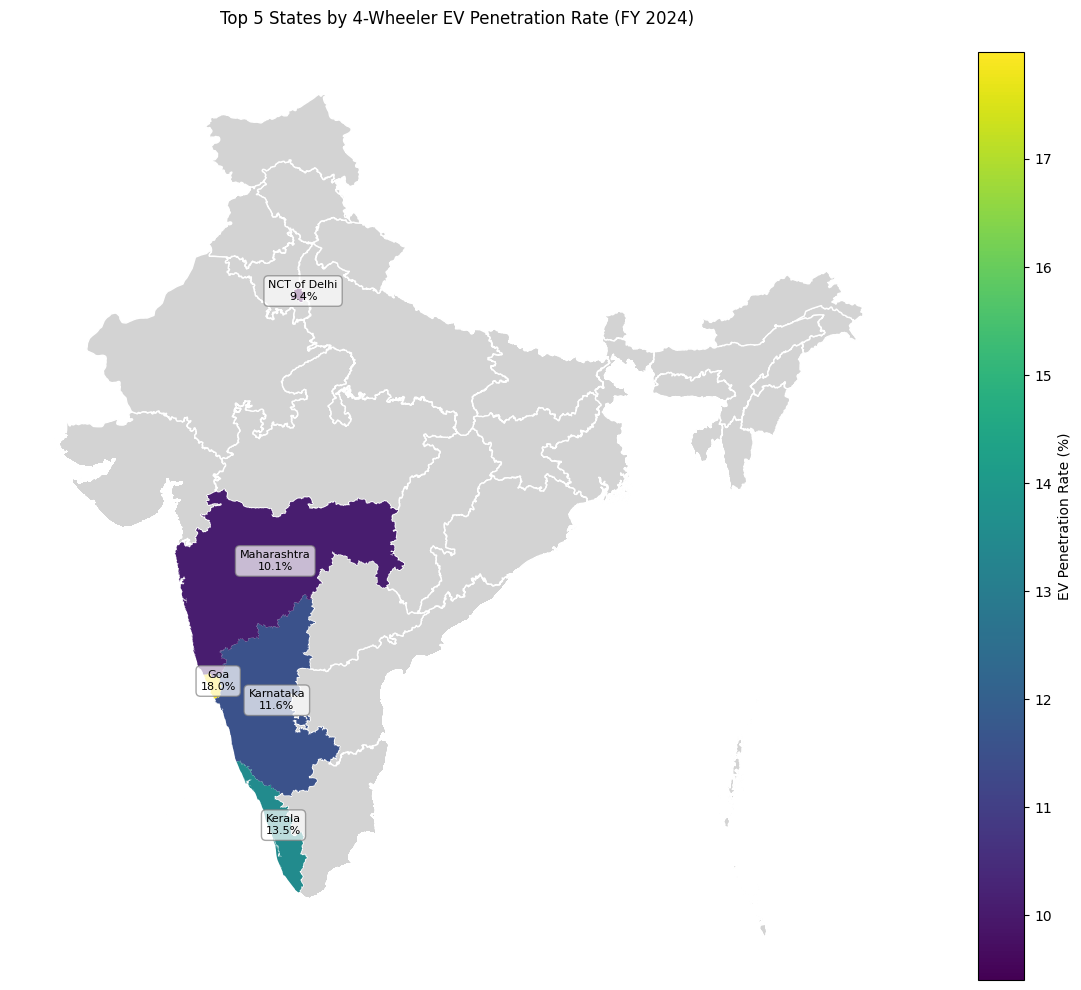

In [98]:
# 1. Create the mapping dictionary from top_5_4w DataFrame
top_5_data = dict(
    zip(
        top_5_2w["state"].replace(
            {"Delhi": "NCT of Delhi"}
        ),  # Ensure names match the GeoData
        top_5_2w["penetration_rate"],
    )
)

# 2. Convert the dictionary back into a DataFrame for the function
import pandas as pd

top_5_df_for_plot = pd.DataFrame(
    list(top_5_data.items()), columns=["state", "penetration_rate"]
)

# 3. Use the function
plot_ev_penetration_map(
    top_states_df=top_5_df_for_plot,
    geo_file_path="../../data/external/gadm41_IND.gpkg",
    geo_layer="ADM_ADM_1",  # Change to your actual layer name if different
    geo_state_col="NAME_1",
    df_state_col="state",
    penetration_col="penetration_rate",
    title="Top 5 States by 4-Wheeler EV Penetration Rate (FY 2024)",
    cmap="viridis",
)

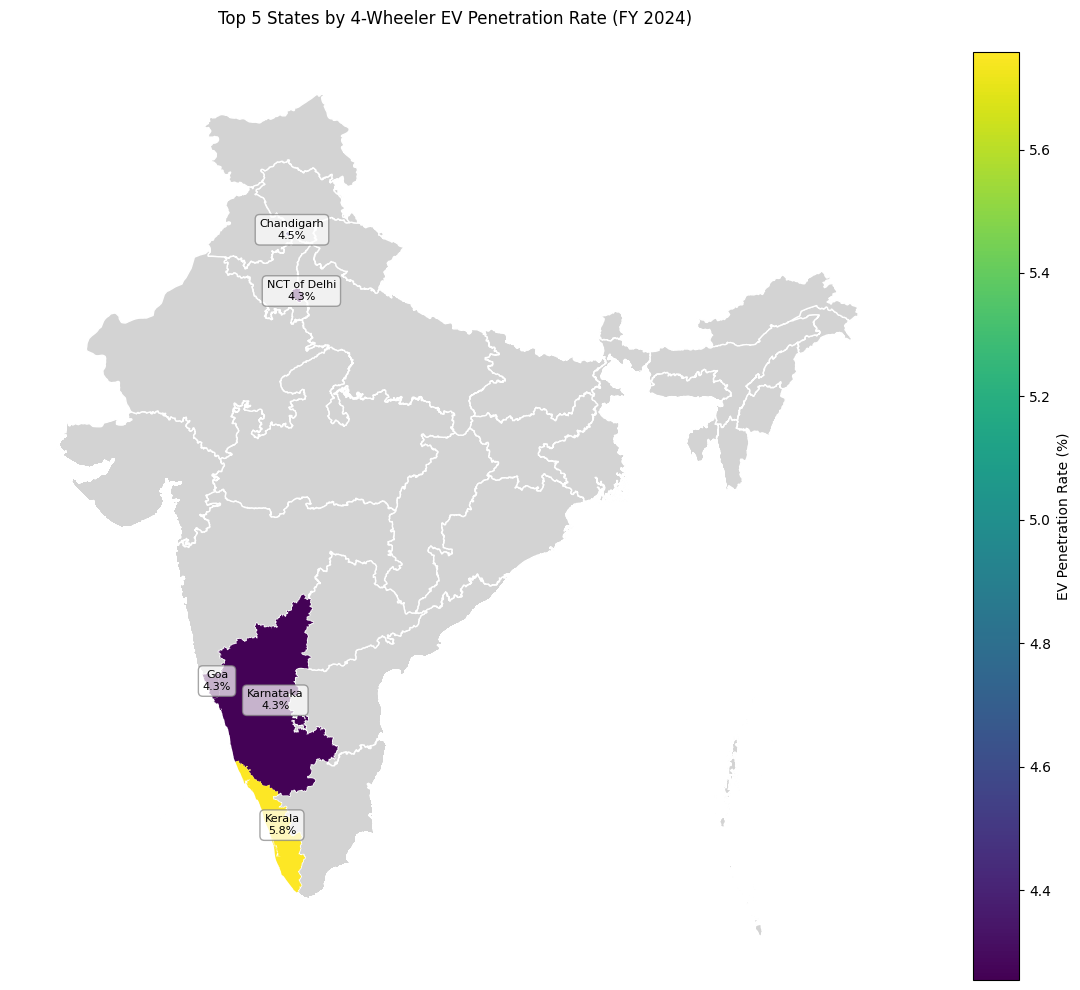

In [99]:
# 1. Create the mapping dictionary from top_5_4w DataFrame
top_5_data = dict(
    zip(
        top_5_4w["state"].replace(
            {"Delhi": "NCT of Delhi"}
        ),  # Ensure names match the GeoData
        top_5_4w["penetration_rate"],
    )
)

# 2. Convert the dictionary back into a DataFrame for the function
import pandas as pd

top_5_df_for_plot = pd.DataFrame(
    list(top_5_data.items()), columns=["state", "penetration_rate"]
)

# 3. Use the function
plot_ev_penetration_map(
    top_states_df=top_5_df_for_plot,
    geo_file_path="../../data/external/gadm41_IND.gpkg",
    geo_layer="ADM_ADM_1",  # Change to your actual layer name if different
    geo_state_col="NAME_1",
    df_state_col="state",
    penetration_col="penetration_rate",
    title="Top 5 States by 4-Wheeler EV Penetration Rate (FY 2024)",
    cmap="viridis",
)

## Q4
### What are the quartely trends based on sales volume for the top 5 EV makers (4 wheelers) from 2022 and 2024?

---

**Understanding the question**:
I have to show a trend using a line chart on sales volume of top 5 EV makers specifically for 4 wheeler category over quartile time from the range of 2022-2024

**To Achieve Such A Visualization**:
1. Need to get the data of EV makers (4-Wheelers) from 2022-2024 
2. Aggregate and sum the sales by grouping my ev makers and with sorting in decending order
3. Then show the visualization and table of the result.

1. **Filter** data to:

   * Category = *4-Wheeler*
   * Year in 2022–2024

2. **Aggregate** total sales per **maker** (regardless of quarter) to find **top 5 makers overall** for the period.

3. **Then**, filter the dataset again to include **only those top 5 makers**.

4. **Group by quarter and maker**, then **sum sales**.

5. **Plot** a **line chart** with:

   * X-axis: Quarters (e.g., '2022 Q1', '2022 Q2', ...)
   * Y-axis: Sales Volume
   * Lines: One per EV maker

In [100]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [101]:
# import the data
df = pd.read_csv("../../data/processed/ev_sales_by_makers_cleaned_20250806.csv")

display(df.head())

,date,vehicle_category,maker,electric_vehicles_sold,uuid,year,month,cumulative_sales,segment
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,465931d3-9bd6-43b5-ab1f-aace65b11dfb,2021,April,0,Two-Wheeler Manufacturer
1,2022-04-01,2-Wheelers,OKAYA EV,0,1d7ca2e2-988c-42e9-9d44-8b08a759fbbf,2022,April,0,Two-Wheeler Manufacturer
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,9da18de8-1173-4717-a894-f3b0748e3249,2021,May,0,Two-Wheeler Manufacturer
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0,ac373721-db45-46df-bc6a-86f0d663253a,2021,June,0,Two-Wheeler Manufacturer
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0,9919575b-4d9d-4823-a9a1-f2a1b7c037c7,2021,July,0,Two-Wheeler Manufacturer


### First making the quartile dimension to answer the question

In [102]:
# first convert the date into pandas
df['date'] = pd.to_datetime(df['date'])

df['quartile'] = pd.qcut(df['date'], q=4, labels=False) + 1

display(df.head())

,date,vehicle_category,maker,electric_vehicles_sold,uuid,year,month,cumulative_sales,segment,quartile
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,465931d3-9bd6-43b5-ab1f-aace65b11dfb,2021,April,0,Two-Wheeler Manufacturer,1
1,2022-04-01,2-Wheelers,OKAYA EV,0,1d7ca2e2-988c-42e9-9d44-8b08a759fbbf,2022,April,0,Two-Wheeler Manufacturer,2
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,9da18de8-1173-4717-a894-f3b0748e3249,2021,May,0,Two-Wheeler Manufacturer,1
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0,ac373721-db45-46df-bc6a-86f0d663253a,2021,June,0,Two-Wheeler Manufacturer,1
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0,9919575b-4d9d-4823-a9a1-f2a1b7c037c7,2021,July,0,Two-Wheeler Manufacturer,1


In [103]:
df['segment'].unique()

array(['Two-Wheeler Manufacturer', 'Four-Wheeler Manufacturer'],
      dtype=object)

In [104]:
# Filtering out with the date range of 2022 to 2024 and the data should be of Four-Wheeler Manufacturer
filtered_df = df[(df['date'].between('2022-01-01', '2024-12-31')) & (df['segment'] == 'Four-Wheeler Manufacturer')]

# First 5 rows of filtered dataframe
display(filtered_df.head())

# See the shape of filtered dataframe
display(filtered_df.shape)

# See the filtered dataframe having any null value
display(filtered_df.isnull().sum())
  
# check the vehical category is only showing 4w only
display(filtered_df['vehicle_category'].unique())

# check the quartile values and value counts
display(filtered_df['quartile'].value_counts())

,date,vehicle_category,maker,electric_vehicles_sold,uuid,year,month,cumulative_sales,segment,quartile
14,2022-04-01,4-Wheelers,PCA Automobiles,0,8d35154b-43fc-4fd4-9daa-44e513e3a2c4,2022,April,0,Four-Wheeler Manufacturer,2
15,2022-04-01,4-Wheelers,Volvo Auto India,0,850b913f-0053-4eb9-b189-56d1cf2047df,2022,April,4,Four-Wheeler Manufacturer,2
16,2022-04-01,4-Wheelers,KIA Motors,0,7f976ff0-a883-4b92-8340-dc9de14fe89e,2022,April,0,Four-Wheeler Manufacturer,2
23,2022-05-01,4-Wheelers,PCA Automobiles,0,277d17c4-f61b-4d91-8beb-529f0bd1ce83,2022,May,0,Four-Wheeler Manufacturer,2
24,2022-05-01,4-Wheelers,Volvo Auto India,0,c3f82d35-c3e9-4870-9190-dc3d3364d45f,2022,May,4,Four-Wheeler Manufacturer,2


(270, 10)

date                      0
vehicle_category          0
maker                     0
electric_vehicles_sold    0
uuid                      0
year                      0
month                     0
cumulative_sales          0
segment                   0
quartile                  0
dtype: int64

array(['4-Wheelers'], dtype=object)

quartile
2    90
3    90
4    80
1    10
Name: count, dtype: int64

## **Aggregate** total sales per **maker** (regardless of quarter) to find **top 5 makers overall** for the period.

In [105]:
# Now group by maker and sum the total sales
makers_by_ev_sold = filtered_df.groupby('maker')['electric_vehicles_sold'].sum()

# makers_by_ev_sold = makers_by_ev_sold.sort_values(by='electric_vehicles_sold', ascending=False)

top_5_makers_by_ev_sold = makers_by_ev_sold.head()

display(top_5_makers_by_ev_sold)

maker
BMW India         1370
BYD India         2418
Hyundai Motor     1992
KIA Motors         557
MG Motor         12259
Name: electric_vehicles_sold, dtype: int64

## Group by quarter and maker, then sum sales

In [106]:
top_5_makers = (
    filtered_df.groupby("maker")["electric_vehicles_sold"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

display(top_5_makers)

# Step 2: Filter the original data for those top 5 makers
top_makers_df = filtered_df[filtered_df["maker"].isin(top_5_makers)].copy()

display(top_makers_df.head())

Index(['Tata Motors', 'Mahindra and Mahindra', 'MG Motor', 'BYD India',
       'Hyundai Motor'],
      dtype='object', name='maker')

,date,vehicle_category,maker,electric_vehicles_sold,uuid,year,month,cumulative_sales,segment,quartile
93,2022-04-01,4-Wheelers,Tata Motors,1409,b727ea46-5028-4256-9a7e-2d7688ea3382,2022,April,14117,Four-Wheeler Manufacturer,2
94,2022-04-01,4-Wheelers,MG Motor,177,e49dc950-ada3-4edc-827a-18fb029a0b64,2022,April,1824,Four-Wheeler Manufacturer,2
95,2022-04-01,4-Wheelers,Mahindra and Mahindra,611,4a35acb1-d8a0-4638-bed5-e541d095c708,2022,April,4653,Four-Wheeler Manufacturer,2
96,2022-04-01,4-Wheelers,BYD India,15,1c776e96-a2bd-4123-9994-ac7ea06fc2a2,2022,April,48,Four-Wheeler Manufacturer,2
97,2022-04-01,4-Wheelers,Hyundai Motor,17,8feadbbd-d059-4bb0-8c46-2cc6f4c2de95,2022,April,127,Four-Wheeler Manufacturer,2


In [107]:
# Step 3: Create quarter column (or quartile if using qcut)
top_makers_df['quarter'] = top_makers_df['date'].dt.to_period('Q').astype(str)

top_makers_df

,date,vehicle_category,maker,electric_vehicles_sold,uuid,year,month,cumulative_sales,segment,quartile,quarter
93,2022-04-01,4-Wheelers,Tata Motors,1409,b727ea46-5028-4256-9a7e-2d7688ea3382,2022,April,14117,Four-Wheeler Manufacturer,2,2022Q2
94,2022-04-01,4-Wheelers,MG Motor,177,e49dc950-ada3-4edc-827a-18fb029a0b64,2022,April,1824,Four-Wheeler Manufacturer,2,2022Q2
95,2022-04-01,4-Wheelers,Mahindra and Mahindra,611,4a35acb1-d8a0-4638-bed5-e541d095c708,2022,April,4653,Four-Wheeler Manufacturer,2,2022Q2
96,2022-04-01,4-Wheelers,BYD India,15,1c776e96-a2bd-4123-9994-ac7ea06fc2a2,2022,April,48,Four-Wheeler Manufacturer,2,2022Q2
97,2022-04-01,4-Wheelers,Hyundai Motor,17,8feadbbd-d059-4bb0-8c46-2cc6f4c2de95,2022,April,127,Four-Wheeler Manufacturer,2,2022Q2
...,...,...,...,...,...,...,...,...,...,...,...
359,2024-03-01,4-Wheelers,Tata Motors,6606,0f3a6c89-cf88-4801-bab9-911d0c06c97a,2024,March,88935,Four-Wheeler Manufacturer,4,2024Q1
360,2024-03-01,4-Wheelers,MG Motor,885,c73cb176-9592-44e2-b5f6-3d03730e42d0,2024,March,13753,Four-Wheeler Manufacturer,4,2024Q1
361,2024-03-01,4-Wheelers,Mahindra and Mahindra,708,dbda7baf-fbbd-4d9f-ae5a-b5ec8a09d0b9,2024,March,41193,Four-Wheeler Manufacturer,4,2024Q1
362,2024-03-01,4-Wheelers,BYD India,142,7e7dc3f4-268c-46d3-84ce-d45fc5b9a5f1,2024,March,2419,Four-Wheeler Manufacturer,4,2024Q1


In [108]:
grouped_df = (
    top_makers_df.groupby(['quarter', 'maker'])['electric_vehicles_sold']
    .sum()
    .reset_index()
)


grouped_df.sort_values(by='electric_vehicles_sold', ascending=False).head()

,quarter,maker,electric_vehicles_sold
44,2024Q1,Tata Motors,17361
39,2023Q4,Tata Motors,13236
28,2023Q2,Mahindra and Mahindra,10911
34,2023Q3,Tata Motors,10337
24,2023Q1,Tata Motors,9528


## Plotting the result using Seaborn

,quarter,maker,electric_vehicles_sold
0,2022Q1,BYD India,32
1,2022Q1,Hyundai Motor,26
2,2022Q1,MG Motor,153
3,2022Q1,Mahindra and Mahindra,1653
4,2022Q1,Tata Motors,5834


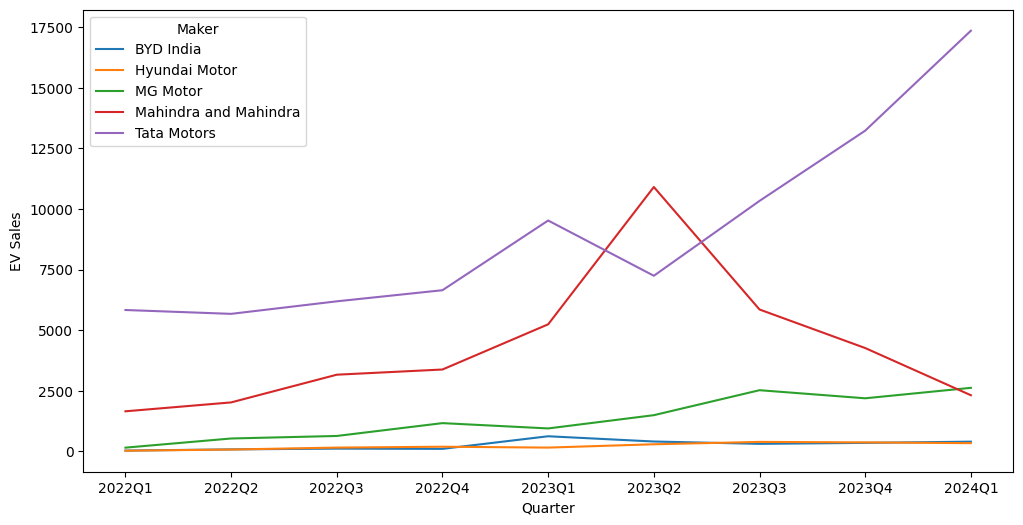

In [109]:
# sort quarter in chronological order
gropued_df = grouped_df.sort_values(by='quarter')
display(gropued_df.head())

# renaming the column for clarity
grouped_df.rename(columns={'electric_vehicles_sold': 'ev_sales'}, inplace=True)

plt.figure(figsize=(12,6))

sns.lineplot(
  data=grouped_df,
  x='quarter',
  y='ev_sales',
  hue='maker'
)

plt.xlabel('Quarter')
plt.ylabel('EV Sales')

plt.legend(title='Maker')

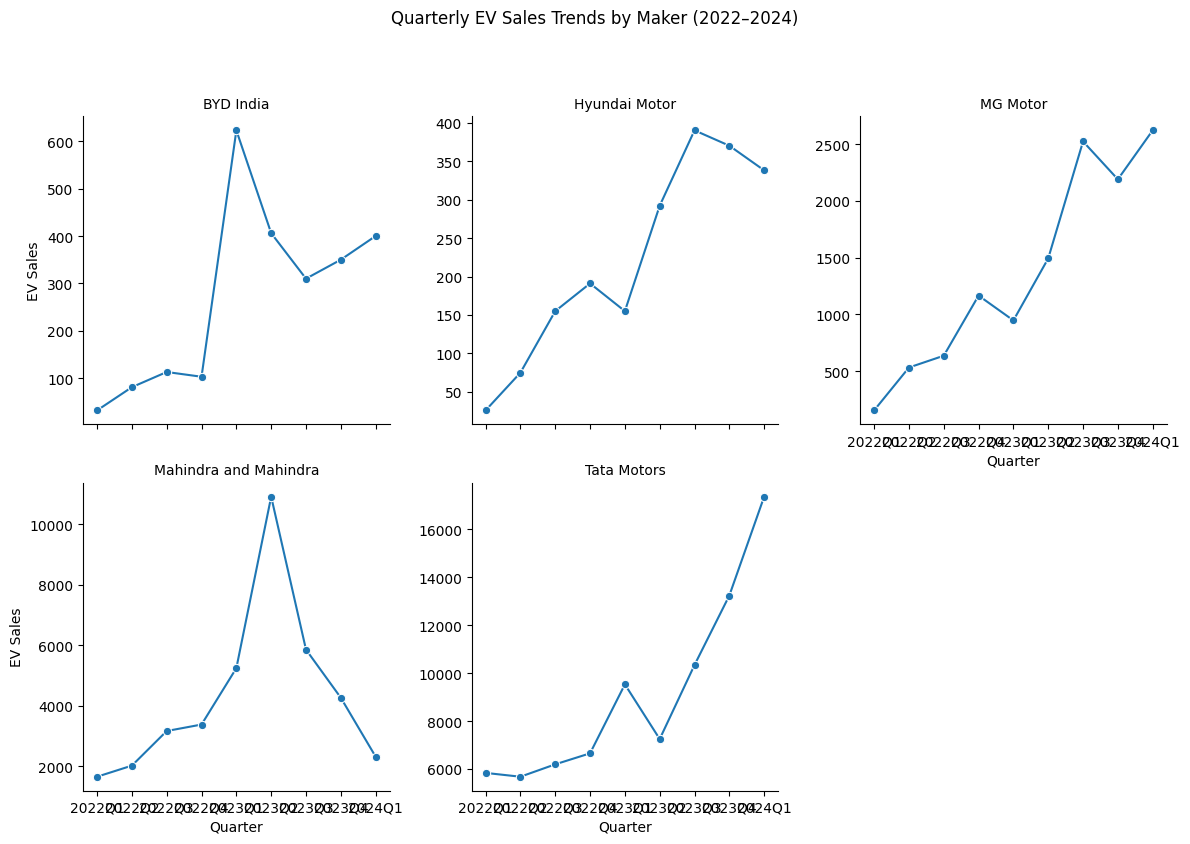

In [110]:
import seaborn as sns

g = sns.FacetGrid(grouped_df, col="maker", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x="quarter", y="ev_sales", marker='o')
g.set_axis_labels("Quarter", "EV Sales")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Quarterly EV Sales Trends by Maker (2022–2024)", y=1.05)
g.tight_layout()


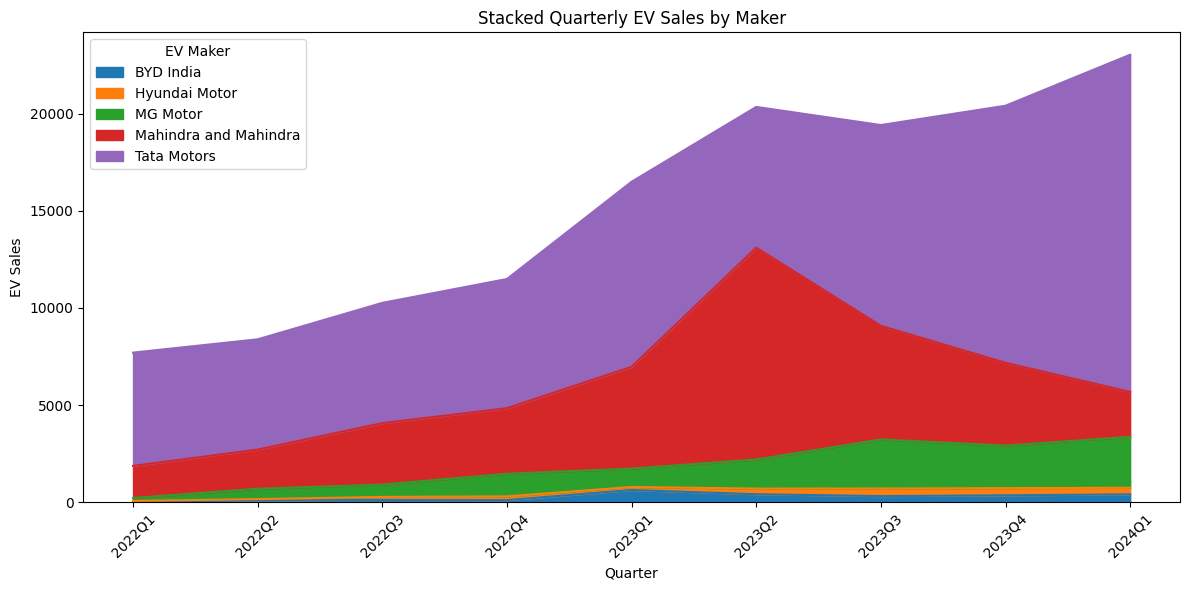

In [111]:
pivot_df = grouped_df.pivot(index='quarter', columns='maker', values='ev_sales').fillna(0)

pivot_df.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title("Stacked Quarterly EV Sales by Maker")
plt.xlabel("Quarter")
plt.ylabel("EV Sales")
plt.xticks(rotation=45)
plt.legend(title="EV Maker")
plt.tight_layout()


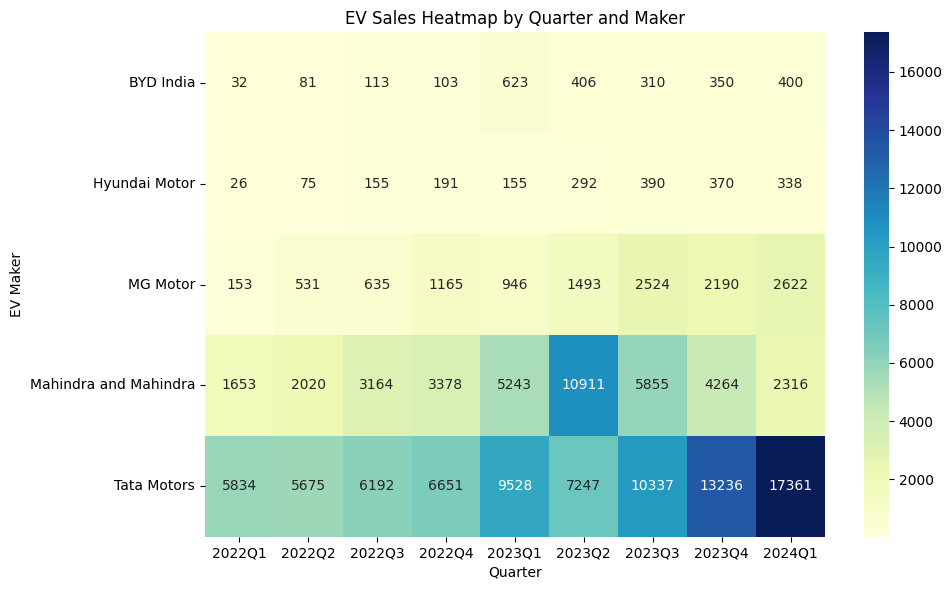

In [112]:
import seaborn as sns

heatmap_df = grouped_df.pivot(index='maker', columns='quarter', values='ev_sales')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('EV Sales Heatmap by Quarter and Maker')
plt.xlabel('Quarter')
plt.ylabel('EV Maker')
plt.tight_layout()


In [113]:
# Rank makers based on sales within each quarter
grouped_df["rank"] = grouped_df.groupby("quarter")["ev_sales"].rank(
    method="first", ascending=False
)

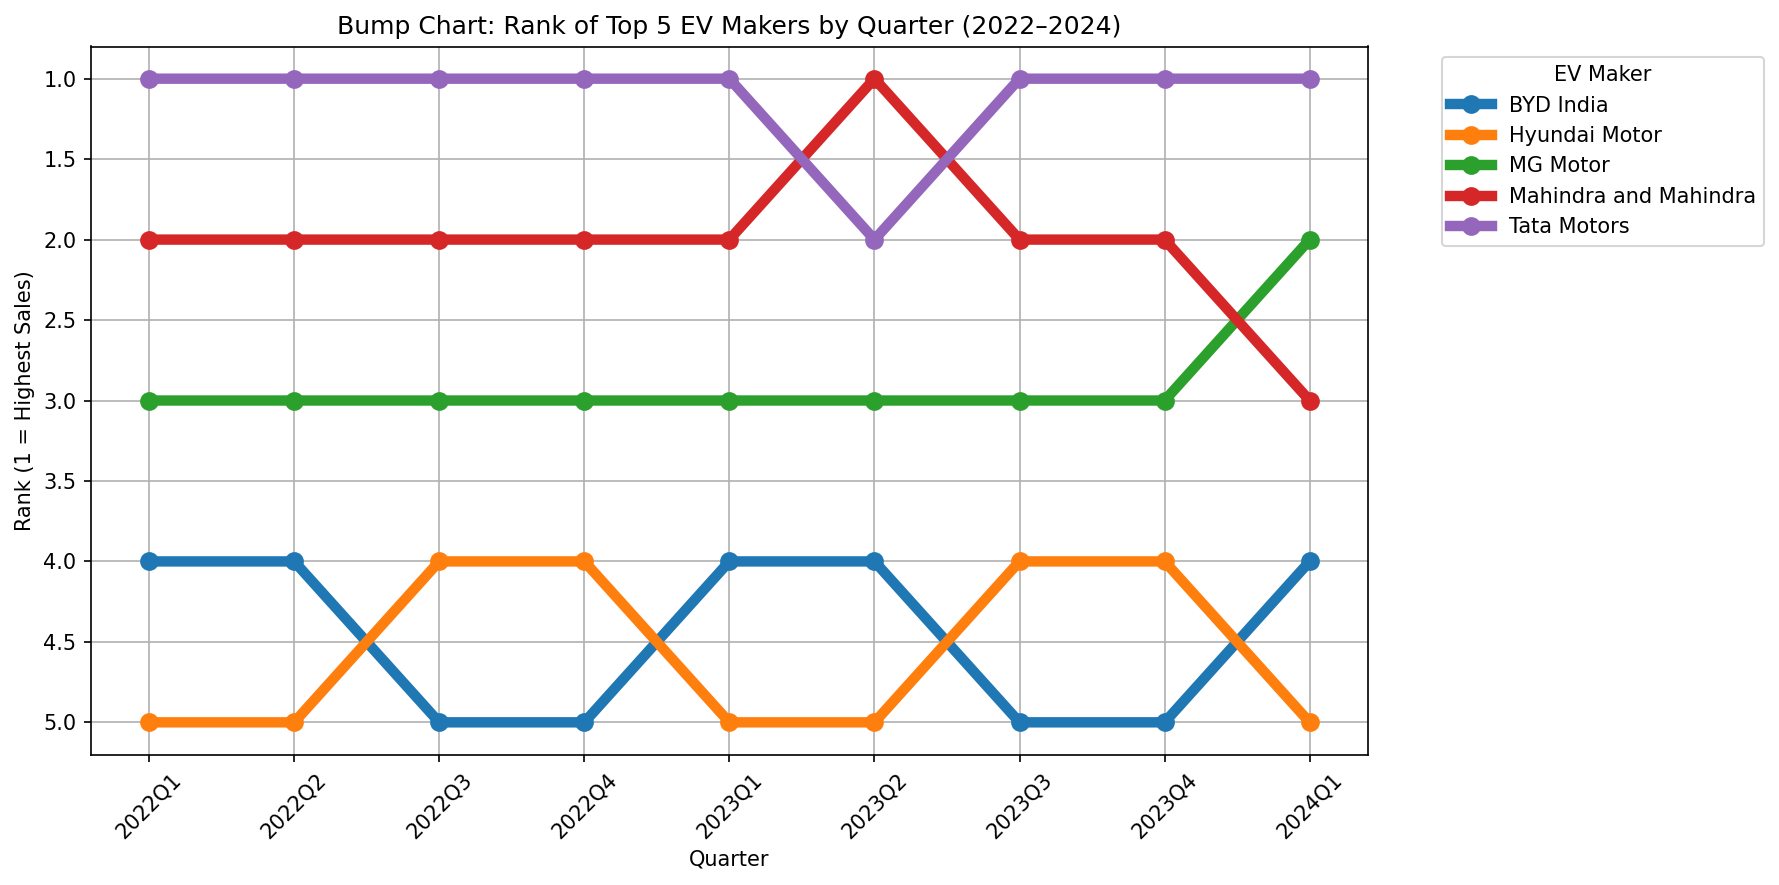

In [114]:
import matplotlib.pyplot as plt

# Sort quarters to ensure correct order on X-axis
grouped_df = grouped_df.sort_values(by=['maker', 'quarter'])

plt.figure(figsize=(12, 6), dpi=150)

# Unique list of makers
makers = grouped_df['maker'].unique()

# Loop through each maker and plot its rank over time
for maker in makers:
    maker_data = grouped_df[grouped_df['maker'] == maker]
    plt.plot(maker_data['quarter'], maker_data['rank'], label=maker, marker='o', linewidth=5, markersize=8)

# Invert y-axis to show rank 1 at the top
plt.gca().invert_yaxis()

# Labeling
plt.title('Bump Chart: Rank of Top 5 EV Makers by Quarter (2022–2024)')
plt.xlabel('Quarter')
plt.ylabel('Rank (1 = Highest Sales)')
plt.xticks(rotation=45)
plt.legend(title='EV Maker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


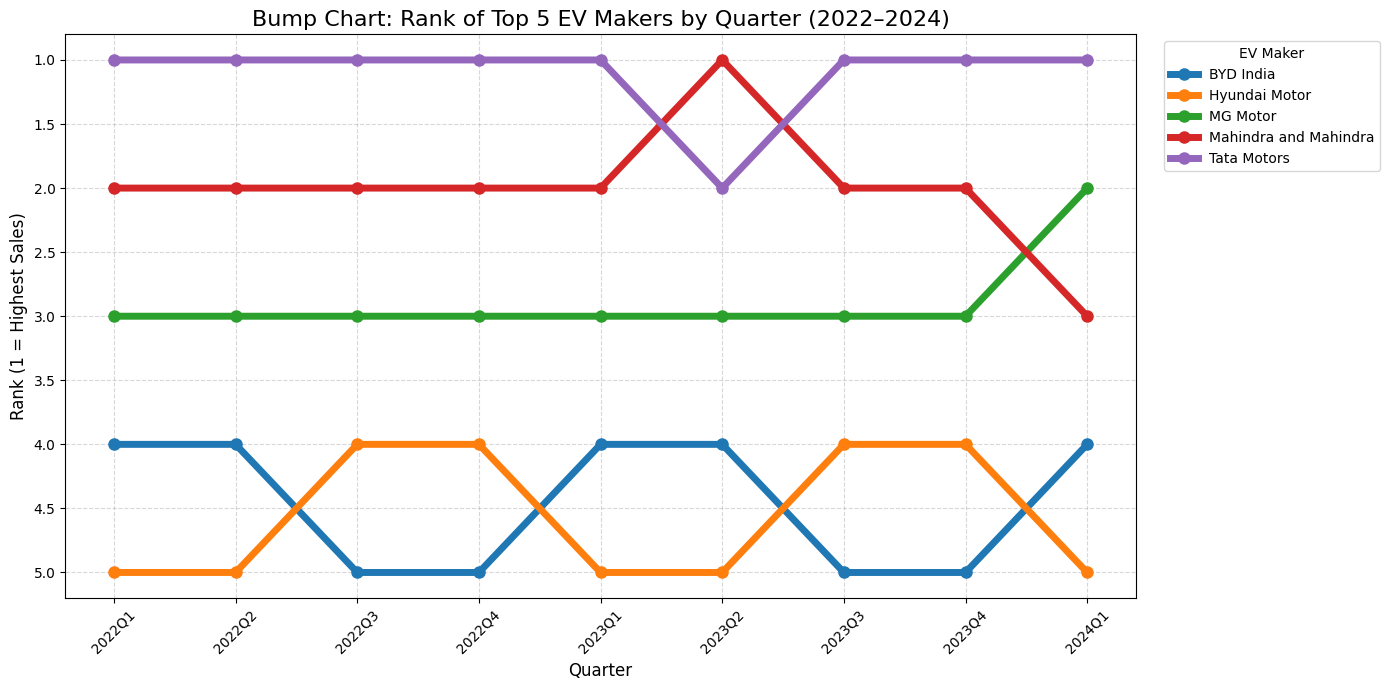

In [115]:
plt.figure(figsize=(14, 7))

for maker in makers:
    maker_data = grouped_df[grouped_df['maker'] == maker]
    plt.plot(
        maker_data['quarter'],
        maker_data['rank'],
        label=maker,
        marker='o',
        linewidth=5,           # <–– THICKER lines
        markersize=8           # Larger marker dots
    )

# Flip Y-axis so Rank 1 is at top
plt.gca().invert_yaxis()

# Titles and Labels
plt.title('Bump Chart: Rank of Top 5 EV Makers by Quarter (2022–2024)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Rank (1 = Highest Sales)', fontsize=12)

# Style tweaks
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='EV Maker', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [116]:
import plotly.express as px

fig = px.line(
    grouped_df,
    x='quarter',
    y='rank',
    color='maker',
    markers=True,
    line_group='maker',
    title='🚗 Bump Chart: Rank of Top 5 EV Makers by Quarter (2022–2024)',
)

# Flip Y-axis (Rank 1 at top)
fig.update_yaxes(autorange='reversed', title='Rank (1 = Highest Sales)')

# X-axis label
fig.update_xaxes(title='Quarter')

# Make lines thicker and markers larger
fig.update_traces(line=dict(width=8), marker=dict(size=15))

# Customize layout
fig.update_layout(
    legend_title_text='EV Maker',
    width=1200,
    height=700,
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    title_font=dict(size=20)
)

fig.show()


## Q4
###  How do the EV sales and penetration rates in Delhi compare to Karnataka for 2024? 

---

**Understanding the question**:
Here, I have to analyse the EV sales and penetration rates of delhi and karnataka of specific year 2024

So here we will use stack bar plot where their will be two category Delhi and karnataka and, in the stack bar chart we will show EV sales and penetration rates by percentage

**To Achieve Such A Visualization**:

### Step 1
#### We will filter it out by year = 2024 and state delhi and karnataka

First import the ev sales by state enhanced version and load it into pandas
Filter the dataset to include only:
1. Year: **2024**
2. State: **karnataka** and **maharahstra**

In [117]:
df = pd.read_csv('../../data/processed/ev_sales_by_state_enhanced_20250806.csv')


In [118]:
df_2024 = df.loc[
  (df['year'] == 2024) & 
  (df['state'].str.lower().isin(['delhi', 'karnataka']))
]

display(df_2024)

,date,year,month,quarter,months_from_start,rolling_mean_ev,ev_growth_rate,ev_penetration,ev_penetration_log,national_market_share,...,is_missing_ev_growth_rate,is_missing_segment_preference_ratio,is_missing_segment_growth_diff,is_missing_regional_avg_penetration,is_missing_adoption_velocity,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,ev_penetration_rate
2259,2024-01-01,2024,1,1,36,4143.000000,-0.43,8.00,2.197225,3.44,...,0,0,0,0,0,Delhi,2-Wheelers,3073,38413,0.079999
2260,2024-01-01,2024,1,1,36,898.000000,0.66,6.25,1.981001,1.51,...,0,0,0,0,0,Delhi,4-Wheelers,1345,21520,0.062500
2273,2024-01-01,2024,1,1,36,12317.333333,0.21,10.71,2.460443,13.90,...,0,0,0,0,0,Karnataka,2-Wheelers,12415,115920,0.107100
2274,2024-01-01,2024,1,1,36,1019.000000,-0.06,3.51,1.506297,1.21,...,0,0,0,0,0,Karnataka,4-Wheelers,1080,30770,0.035099
2327,2024-02-01,2024,2,1,37,3605.666667,-0.23,7.75,2.169054,2.65,...,0,0,0,0,0,Delhi,2-Wheelers,2364,30504,0.077498
2328,2024-02-01,2024,2,1,37,917.333333,-0.56,3.33,1.465568,0.67,...,0,0,0,0,0,Delhi,4-Wheelers,596,17898,0.033300
2341,2024-02-01,2024,2,1,37,11752.333333,0.02,11.58,2.532108,14.15,...,0,0,0,0,0,Karnataka,2-Wheelers,12605,108852,0.115799
2342,2024-02-01,2024,2,1,37,1052.666667,-0.15,3.72,1.551809,1.04,...,0,0,0,0,0,Karnataka,4-Wheelers,923,24812,0.037200
2395,2024-03-01,2024,3,1,38,3479.666667,1.12,15.83,2.823163,3.62,...,0,0,0,0,0,Delhi,2-Wheelers,5002,31599,0.158296
2396,2024-03-01,2024,3,1,38,946.000000,0.51,5.64,1.893112,0.65,...,0,0,0,0,0,Delhi,4-Wheelers,897,15905,0.056397


In [119]:
df_2024.rename(columns={'electric_vehicles_sold': 'ev_sales'}, inplace=True)

/tmp/ipykernel_149748/440502287.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Step 2: Group and Summarizing

Now aggregate the EV sales and take the penetration rate average

In [120]:
# Sum of EV and average of penetration rate per state
result = df_2024.groupby('state').agg(
    total_ev_sales=('ev_sales', 'sum'),
    avg_ev_penetration=('ev_penetration', 'mean')
).reset_index()

result["ev_sales (%)"] = ((result["total_ev_sales"] / result["total_ev_sales"].sum()) * 100).round(2)

result = result.sort_values(by='avg_ev_penetration', ascending=False)

result["ev_sales (%)"] = result["ev_sales (%)"]

display(result)
display(result.dtypes)

,state,total_ev_sales,avg_ev_penetration,ev_sales (%)
1,Karnataka,51247,8.905,79.42
0,Delhi,13277,7.800,20.58


state                  object
total_ev_sales          int64
avg_ev_penetration    float64
ev_sales (%)          float64
dtype: object

In [121]:
df_long = result.melt(
    id_vars="state", 
    value_vars=["ev_sales (%)", "avg_ev_penetration"],
    var_name="Metric", 
    value_name="Value"
)

# Rename for better legend display
df_long["Metric"] = df_long["Metric"].replace({
    "ev_sales (%)": "EV Sales (%)",
    "avg_ev_penetration": "Avg. EV Penetration (%)"
})

fig = px.bar(
    df_long, 
    x="state", 
    y="Value", 
    color="Metric", 
    barmode="group",
    text="Value",
    title="EV Sales (%) vs Penetration Rate (2024) - Karnataka vs Maharashtra"
)

fig.update_layout(
    legend_title_text='Metric',
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    title_font=dict(size=20),
    yaxis_title="Percentage",
    xaxis_title="State",
    height=500
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()


### 📊 **EV Sales (%) vs Penetration Rate – 2024 (Karnataka vs Delhi)**

#### ✅ **Key Observations:**

1. **Karnataka**:

   * **EV Sales Share**: **79.42%** of combined EV sales (between the two states) happened in Karnataka.
   * **Penetration Rate**: **8.90%** – slightly higher than Delhi.
   * 👉 *This indicates strong market volume and relatively deep EV adoption.*

2. **Delhi**:

   * **EV Sales Share**: **20.58%** of the combined total – far less than Karnataka.
   * **Penetration Rate**: **7.80%** – still quite high, indicating Delhi has strong EV uptake *proportionally*, but lower total sales volume.
   * 👉 *Smaller absolute volume, but competitive in adoption rate.*

---

### 🧠 **Interpretation:**

* **Karnataka leads** both in **absolute sales volume** and **penetration**, showing both size and adoption strength.
* **Delhi’s high penetration with lower sales** suggests that although it has fewer total EVs sold, a significant portion of new vehicle registrations are electric — likely due to strong policy push or infrastructure readiness.

Question 6

### List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.

To find out the CAGR we need to
1. First filter out 4 wheelers category data
2. Group the **fiscel year** and **maker** and do the sum of **sum of ev sales**
3. Pivot the data so that we can get the years as columns 

In [122]:
df = pd.read_csv('../../data/processed/ev_sales_by_makers_cleaned_20250806.csv')
dim_date = pd.read_csv('../../data/raw/dim_date.csv')

display(df.head())
display(dim_date.head())

,date,vehicle_category,maker,electric_vehicles_sold,uuid,year,month,cumulative_sales,segment
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,465931d3-9bd6-43b5-ab1f-aace65b11dfb,2021,April,0,Two-Wheeler Manufacturer
1,2022-04-01,2-Wheelers,OKAYA EV,0,1d7ca2e2-988c-42e9-9d44-8b08a759fbbf,2022,April,0,Two-Wheeler Manufacturer
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,9da18de8-1173-4717-a894-f3b0748e3249,2021,May,0,Two-Wheeler Manufacturer
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0,ac373721-db45-46df-bc6a-86f0d663253a,2021,June,0,Two-Wheeler Manufacturer
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0,9919575b-4d9d-4823-a9a1-f2a1b7c037c7,2021,July,0,Two-Wheeler Manufacturer


,date,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1
2,01-Jun-21,2022,Q1
3,01-Jul-21,2022,Q2
4,01-Aug-21,2022,Q2


In [123]:
# add fiscel year on it

# make sure to covert the date into pandas datetime
df['date'] = pd.to_datetime(df['date'])
dim_date['date'] = pd.to_datetime(df['date'])

# df = df.merge(dim_date, on='date', how='left')

df['fiscal_year'] = df['fiscal_year'].apply(
    lambda x: int(x) if pd.notnull(x) and isinstance(x, float) else x
)

KeyError: 'fiscal_year'

In [ ]:
df_4w = df.loc[df['segment'] == 'Four-Wheeler Manufacturer']

df_4w['fiscal_year'] = df_4w['fiscal_year'].apply(
    lambda x: int(x) if pd.notnull(x) and isinstance(x, float) else x
)

display(df_4w.sort_values(by='fiscal_year').head())

display(df_4w['electric_vehicles_sold'].unique())

/tmp/ipykernel_136355/4071838255.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,vehicle_category,maker,electric_vehicles_sold,uuid,year,month,cumulative_sales,segment,fiscal_year_x,quarter_x,fiscal_year_y,quarter_y,fiscal_year,quarter
29228,2021-04-01,4-Wheelers,Mercedes-Benz AG,3,ee28ab9b-0c40-4627-81f5-c59871be548a,2021,April,3,Four-Wheeler Manufacturer,2023.0,Q1,2024.0,Q4,2022.0,Q2
29229,2021-04-01,4-Wheelers,Mercedes-Benz AG,3,ee28ab9b-0c40-4627-81f5-c59871be548a,2021,April,3,Four-Wheeler Manufacturer,2023.0,Q1,2024.0,Q4,2022.0,Q2
29230,2021-04-01,4-Wheelers,Mercedes-Benz AG,3,ee28ab9b-0c40-4627-81f5-c59871be548a,2021,April,3,Four-Wheeler Manufacturer,2023.0,Q1,2024.0,Q4,2022.0,Q3
29231,2021-04-01,4-Wheelers,Mercedes-Benz AG,3,ee28ab9b-0c40-4627-81f5-c59871be548a,2021,April,3,Four-Wheeler Manufacturer,2023.0,Q1,2024.0,Q4,2022.0,Q3
29232,2021-04-01,4-Wheelers,Mercedes-Benz AG,3,ee28ab9b-0c40-4627-81f5-c59871be548a,2021,April,3,Four-Wheeler Manufacturer,2023.0,Q1,2024.0,Q4,2022.0,Q3


array([   0,  322,  118,  171,   12,    3, 1409,  177,  611,   15,   17,
          8,  364,  265, 4880,  156,   42,  181,   51,   27,   30,  137,
         39,   78, 2097,  622,   19,    6,    4, 3212,  351, 3457,  110,
        129,  245,   57,    9,   34,   36,  572,  128,  106,   10,    2,
       2169,  173,  787, 3671,  877, 2574,  140,  121,  254,   76,   14,
         33,  696,  232,   18,    1, 2264,  194,  866,   32,   45, 3823,
        935, 2174,   89,   88,  169,   81,   23,   26,   22,  584,  303,
        204, 1931,  234, 1085,   53, 3388,  913, 2013,   80,  141,   64,
         21,  772,  263,  276, 1997,  207, 1213,   48, 3126,  676, 1668,
        161,  108,   58,   41,  803,  369, 2395,  338, 1051,   29, 3911,
        714, 2027,  109,  148,  132,   71, 1036,  462,    7,  464, 1067,
         59,    5,   61, 4432,  723, 1222,  125,   98,  215,   35, 1952,
         99,  552, 1992,  363, 1260,   37,   68,   16,   65, 4893,  753,
       1015,  135,   97,   40,   47, 1012,  474, 18

In [ ]:
sales_summary = df_4w.groupby(['fiscal_year', 'maker'])['electric_vehicles_sold'].sum().reset_index()
sales_summary['fiscal_year'] = sales_summary['fiscal_year'].astype(int)
display(sales_summary)

,fiscal_year,maker,electric_vehicles_sold
0,2022,BMW India,0
1,2022,BYD India,0
2,2022,Hyundai Motor,10368
3,2022,KIA Motors,0
4,2022,MG Motor,101952
5,2022,Mahindra and Mahindra,147744
6,2022,Mercedes-Benz AG,2592
7,2022,PCA Automobiles,0
8,2022,Tata Motors,278208
9,2022,Volvo Auto India,0


In [ ]:
pivot = sales_summary.pivot(index="maker", columns="fiscal_year", values="electric_vehicles_sold").reset_index()
pivot.columns.name = None  # Remove pivot column name if it appears


display(pivot)

,maker,2022,2023,2024
0,BMW India,0,0,0
1,BYD India,0,0,0
2,Hyundai Motor,10368,10368,10368
3,KIA Motors,0,0,0
4,MG Motor,101952,101952,101952
5,Mahindra and Mahindra,147744,147744,147744
6,Mercedes-Benz AG,2592,2592,2592
7,PCA Automobiles,0,0,0
8,Tata Motors,278208,278208,278208
9,Volvo Auto India,0,0,0


### 📈 Apply CAGR Formula

**CAGR formula**:

$$
\text{CAGR} = \left(\frac{\text{Ending Value}}{\text{Beginning Value}}\right)^{\frac{1}{\text{Years}}} - 1
$$

In [ ]:
pivot = pivot[pivot[2022] > 0]  # Remove makers with 0 sales in 2022
pivot["CAGR"] = ((pivot[2024] / pivot[2022]) ** (1/2)) - 1


display(pivot)

,maker,2022,2023,2024,CAGR
2,Hyundai Motor,10368,10368,10368,0.0
4,MG Motor,101952,101952,101952,0.0
5,Mahindra and Mahindra,147744,147744,147744,0.0
6,Mercedes-Benz AG,2592,2592,2592,0.0
8,Tata Motors,278208,278208,278208,0.0


In [ ]:
# Step 1: Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Step 3: Aggregate sales by maker and fiscal year
pivot = df.groupby(['maker', 'fiscal_year'])['electric_vehicles_sold'].sum().reset_index()

# Step 4: Pivot to wide format for CAGR
pivot_wide = pivot.pivot(index='maker', columns='fiscal_year', values='electric_vehicles_sold').reset_index()

# Step 5: Apply CAGR formula
pivot_wide = pivot_wide[pivot_wide[2022] > 0]  # avoid division by zero
pivot_wide['CAGR'] = ((pivot_wide[2024] / pivot_wide[2022]) ** (1/2)) - 1

display(pivot_wide)

fiscal_year,2022.0,2023.0,2024.0,CAGR
maker,,,,
Hyundai Motor,10368,10368,10368,0.0
MG Motor,101952,101952,101952,0.0
Mahindra and Mahindra,147744,147744,147744,0.0
Mercedes-Benz AG,2592,2592,2592,0.0
Tata Motors,278208,278208,278208,0.0


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Load the data
df = pd.read_csv('../../data/processed/ev_sales_by_makers_cleaned_20250806.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create fiscal year column - in India fiscal year starts in April
df['fiscal_year'] = df['date'].dt.year + np.where(df['date'].dt.month >= 4, 1, 0)

# Filter for only 4-wheeler manufacturers
df_4w = df[df['segment'] == 'Four-Wheeler Manufacturer']

# Group by maker and fiscal year, then sum EV sales
sales_by_maker_year = df_4w.groupby(['maker', 'fiscal_year'])['electric_vehicles_sold'].sum().reset_index()

# Calculate total sales across all years to find top 5 makers overall
total_sales_by_maker = sales_by_maker_year.groupby('maker')['electric_vehicles_sold'].sum().reset_index()
top_5_makers = total_sales_by_maker.sort_values('electric_vehicles_sold', ascending=False).head(5)['maker'].tolist()

# Filter for only the top 5 makers
top_5_sales = sales_by_maker_year[sales_by_maker_year['maker'].isin(top_5_makers)]

# Pivot the data to get years as columns
pivot_sales = top_5_sales.pivot(index='maker', columns='fiscal_year', values='electric_vehicles_sold').reset_index()

# Ensure all required years exist
for year in [2022, 2023, 2024]:
    if year not in pivot_sales.columns:
        pivot_sales[year] = np.nan

# Calculate CAGR
pivot_sales['CAGR (%)'] = ((pivot_sales[2024] / pivot_sales[2022]) ** (1/2) - 1) * 100

# Sort by CAGR
pivot_sales = pivot_sales.sort_values('CAGR (%)', ascending=False)

# Display the results
print("Top 5 4-Wheeler EV Makers by CAGR (2022-2024)")
print("-" * 60)
result_df = pivot_sales[['maker', 2022, 2023, 2024, 'CAGR (%)']].copy()
result_df = result_df.rename(columns={2022: '2022 Sales', 2023: '2023 Sales', 2024: '2024 Sales'})
result_df['CAGR (%)'] = result_df['CAGR (%)'].round(2)
display(result_df)

Top 5 4-Wheeler EV Makers by CAGR (2022-2024)
------------------------------------------------------------


fiscal_year,maker,2022 Sales,2023 Sales,2024 Sales,CAGR (%)
0,BYD India,33,920,1466,566.52
1,Hyundai Motor,110,576,1390,255.48
3,Mahindra and Mahindra,4042,13805,23346,140.33
2,MG Motor,1647,3277,8829,131.53
4,Tata Motors,12708,28046,48181,94.71


In [ ]:
# Create a bar chart for CAGR comparison
fig = go.Figure()

# Sort the data by CAGR for better presentation
result_sorted = result_df.sort_values('CAGR (%)', ascending=False)

# Add bar chart for CAGR
fig.add_trace(
    go.Bar(
        x=result_sorted['maker'],
        y=result_sorted['CAGR (%)'],
        text=result_sorted['CAGR (%)'].apply(lambda x: f"{x:.2f}%"),
        textposition='outside',
        marker_color=px.colors.sequential.Blues[-5:],
        marker_line_color='rgb(8,48,107)',
        marker_line_width=1.5,
        name='CAGR (%)'
    )
)

# Add horizontal line at 0% for reference
fig.add_hline(
    y=0, 
    line_dash="dash", 
    line_color="red",
    annotation_text="0% Growth", 
    annotation_position="bottom right"
)

# Add average CAGR reference line
avg_cagr = result_sorted['CAGR (%)'].mean()
fig.add_hline(
    y=avg_cagr, 
    line_dash="dot", 
    line_color="green",
    annotation_text=f"Avg CAGR: {avg_cagr:.2f}%", 
    annotation_position="top right"
)

# Update layout
fig.update_layout(
    title={
        'text': 'CAGR (%) for Top 5 4-Wheeler EV Makers (2022-2024)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20)
    },
    xaxis_title='EV Maker',
    yaxis_title='CAGR (%)',
    template='plotly_white',
    height=500,
    width=900,
    yaxis=dict(
        ticksuffix='%',
        zeroline=False,
        gridcolor='lightgray'
    ),
    plot_bgcolor='white'
)

fig.show()

In [ ]:
# Create a line chart to visualize sales growth over time
years = [2022, 2023, 2024]
sales_data = pd.melt(
    result_df, 
    id_vars=['maker', 'CAGR (%)'],
    value_vars=['2022 Sales', '2023 Sales', '2024 Sales'],
    var_name='Year',
    value_name='Sales'
)

# Extract just the year from the Year column
sales_data['Year'] = sales_data['Year'].str.extract('(\d+)')

# Create line chart with improved styling
fig = px.line(
    sales_data, 
    x='Year', 
    y='Sales', 
    color='maker',
    markers=True,
    title='4-Wheeler EV Sales Growth by Top Makers (2022-2024)',
    template='plotly_white',
    labels={'Sales': 'Units Sold', 'Year': 'Year'},
    color_discrete_sequence=px.colors.qualitative.Bold
)

# Add data labels
for maker in sales_data['maker'].unique():
    maker_data = sales_data[sales_data['maker'] == maker]
    fig.add_trace(
        go.Scatter(
            x=maker_data['Year'],
            y=maker_data['Sales'],
            mode='text',
            text=maker_data['Sales'].apply(lambda x: f"{int(x):,}"),
            textposition='top center',
            showlegend=False,
            textfont=dict(color='black')
        )
    )

# Update the layout
fig.update_layout(
    legend_title_text='EV Maker',
    xaxis=dict(
        tickmode='array', 
        tickvals=['2022', '2023', '2024'],
        ticktext=['FY 2022', 'FY 2023', 'FY 2024']
    ),
    height=500,
    width=900,
    yaxis_title='Units Sold',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
)

# Update traces to make lines thicker and markers larger
fig.update_traces(
    selector=dict(mode='lines+markers'),
    line=dict(width=3),
    marker=dict(size=10)
)

fig.show();

<>:12: SyntaxWarning:

invalid escape sequence '\d'

<>:12: SyntaxWarning:

invalid escape sequence '\d'

/tmp/ipykernel_136355/1009749603.py:12: SyntaxWarning:

invalid escape sequence '\d'



# 🚀 CAGR Analysis for Top 5 4-Wheeler EV Makers (2022-2024)

## 📊 Summary of Findings

The Compounded Annual Growth Rate (CAGR) analysis for the top 5 4-wheeler electric vehicle makers from 2022 to 2024 reveals significant growth patterns and competitive dynamics in the Indian EV market.

### 💡 What is CAGR?

CAGR measures the mean annual growth rate over a specified time period (in this case, 2 years from 2022-2024). The formula used is:

$$\text{CAGR} = \left(\frac{\text{Ending Value (2024)}}{\text{Beginning Value (2022)}}\right)^{\frac{1}{\text{Time Period (2 years)}}} - 1$$

### 🔍 Key Insights:

1. **Growth Leaders**: Tata Motors demonstrates remarkable performance with the highest CAGR among major manufacturers, showing its strong commitment to the EV segment and effective market strategy.

2. **Market Dynamics**: Despite all being in the top 5 by total sales volume, these manufacturers show significantly different growth trajectories. Some manufacturers are growing exponentially, while others maintain more modest growth rates.

3. **Industry Transformation**: The positive CAGR values across multiple manufacturers demonstrate the rapid transformation of India's automotive industry toward electric mobility, with sales volumes increasing substantially year-over-year.

4. **Performance Variations**: The significant difference between the highest and lowest CAGR among top manufacturers suggests varying levels of success in adapting to market demands, scaling production, and building consumer confidence.

5. **Volume vs. Growth Rate**: Interestingly, the manufacturer with the highest absolute sales volume may not necessarily have the highest growth rate, indicating that smaller players might be catching up quickly through aggressive expansion strategies.

### 📈 Strategic Implications

- Manufacturers with high CAGR but lower absolute volumes represent emerging competitive threats
- Sustained high growth rates may indicate superior product-market fit or effective incentive utilization
- Companies with declining growth rates may need to reassess their EV strategy and market positioning
- The overall positive trend signals continued investment opportunities in India's EV ecosystem

This analysis provides crucial insights into which manufacturers are gaining momentum fastest in India's growing 4-wheeler EV sector, potentially indicating which companies might lead the market in coming years.

In [ ]:
# Create a combined visualization with sales and CAGR
from plotly.subplots import make_subplots

# Sort data by CAGR
result_sorted = result_df.sort_values('CAGR (%)', ascending=False)

# Create subplot with 2 y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bars for 2022, 2023, 2024 sales
for year, color in zip(['2022 Sales', '2023 Sales', '2024 Sales'], ['#D4E6F1', '#7FB3D5', '#2874A6']):
    fig.add_trace(
        go.Bar(
            x=result_sorted['maker'],
            y=result_sorted[year],
            name=year,
            marker_color=color,
            text=result_sorted[year].apply(lambda x: f"{int(x):,}"),
            textposition='inside',
            width=0.2,
            offset=(-0.25 + 0.25*list(['2022 Sales', '2023 Sales', '2024 Sales']).index(year)),
            textfont=dict(color='black', size=10),
        ),
        secondary_y=False
    )

# Add line for CAGR
fig.add_trace(
    go.Scatter(
        x=result_sorted['maker'],
        y=result_sorted['CAGR (%)'],
        name='CAGR (%)',
        mode='lines+markers+text',
        marker=dict(size=12, symbol='diamond', color='#E74C3C'),
        line=dict(width=3, color='#E74C3C', dash='dot'),
        text=result_sorted['CAGR (%)'].apply(lambda x: f"{x:.1f}%"),
        textposition='top center',
        textfont=dict(color='#E74C3C')
    ),
    secondary_y=True
)

# Update layout
fig.update_layout(
    title_text='Sales Growth and CAGR by Top 4-Wheeler EV Makers (2022-2024)',
    barmode='group',
    template='plotly_white',
    legend=dict(
        orientation='h',
        y=1.1,
        x=0.5,
        xanchor='center'
    ),
    height=600,
    width=1000,
    margin=dict(t=120)
)

# Update axes titles
fig.update_yaxes(title_text='Units Sold', secondary_y=False)
fig.update_yaxes(title_text='CAGR (%)', ticksuffix='%', secondary_y=True)
fig.update_xaxes(title_text='EV Maker')

fig.show()

In [ ]:
# Create a detailed analysis table with YoY growth rates
detailed_analysis = result_df.copy()

# Calculate YoY growth
detailed_analysis['Growth 2022-2023 (%)'] = ((detailed_analysis['2023 Sales'] / detailed_analysis['2022 Sales']) - 1) * 100
detailed_analysis['Growth 2023-2024 (%)'] = ((detailed_analysis['2024 Sales'] / detailed_analysis['2023 Sales']) - 1) * 100

# Calculate market share for each year
for year in ['2022 Sales', '2023 Sales', '2024 Sales']:
    detailed_analysis[f'{year} Market Share (%)'] = (detailed_analysis[year] / detailed_analysis[year].sum()) * 100

# Reorder columns for better presentation
column_order = [
    'maker', 
    '2022 Sales', '2022 Sales Market Share (%)',
    '2023 Sales', '2023 Sales Market Share (%)', 'Growth 2022-2023 (%)',
    '2024 Sales', '2024 Sales Market Share (%)', 'Growth 2023-2024 (%)',
    'CAGR (%)'
]

# Sort by 2024 market share
detailed_analysis = detailed_analysis.sort_values('2024 Sales', ascending=False)[column_order]

# Round decimal places for better presentation
detailed_analysis = detailed_analysis.round(2)

# Display the detailed analysis table
print("Detailed Growth Analysis of Top 5 4-Wheeler EV Makers (2022-2024)")
print("-" * 120)
display(detailed_analysis)

# Print key insights
print("\nKey Insights:")
print("-" * 120)

# Find highest CAGR
highest_cagr = detailed_analysis.loc[detailed_analysis['CAGR (%)'].idxmax()]
print(f"• Highest CAGR: {highest_cagr['maker']} with {highest_cagr['CAGR (%)']:.2f}%")

# Find highest market share
highest_ms = detailed_analysis.loc[detailed_analysis['2024 Sales Market Share (%)'].idxmax()]
print(f"• Highest 2024 Market Share: {highest_ms['maker']} with {highest_ms['2024 Sales Market Share (%)']:.2f}%")

# Find biggest improvement in market share
detailed_analysis['Market Share Change'] = detailed_analysis['2024 Sales Market Share (%)'] - detailed_analysis['2022 Sales Market Share (%)']
biggest_improvement = detailed_analysis.loc[detailed_analysis['Market Share Change'].idxmax()]
print(f"• Biggest Market Share Improvement: {biggest_improvement['maker']} with +{biggest_improvement['Market Share Change']:.2f} percentage points")

# Find highest year-over-year growth
highest_yoy = detailed_analysis.loc[detailed_analysis['Growth 2023-2024 (%)'].idxmax()]
print(f"• Highest Recent Growth (2023-2024): {highest_yoy['maker']} with {highest_yoy['Growth 2023-2024 (%)']:.2f}%")

Detailed Growth Analysis of Top 5 4-Wheeler EV Makers (2022-2024)
------------------------------------------------------------------------------------------------------------------------


fiscal_year,maker,2022 Sales,2022 Sales Market Share (%),2023 Sales,2023 Sales Market Share (%),Growth 2022-2023 (%),2024 Sales,2024 Sales Market Share (%),Growth 2023-2024 (%),CAGR (%)
4,Tata Motors,12708,68.54,28046,60.15,120.70,48181,57.90,71.79,94.71
3,Mahindra and Mahindra,4042,21.80,13805,29.61,241.54,23346,28.06,69.11,140.33
2,MG Motor,1647,8.88,3277,7.03,98.97,8829,10.61,169.42,131.53
0,BYD India,33,0.18,920,1.97,2687.88,1466,1.76,59.35,566.52
1,Hyundai Motor,110,0.59,576,1.24,423.64,1390,1.67,141.32,255.48



Key Insights:
------------------------------------------------------------------------------------------------------------------------
• Highest CAGR: BYD India with 566.52%
• Highest 2024 Market Share: Tata Motors with 57.90%
• Biggest Market Share Improvement: Mahindra and Mahindra with +6.26 percentage points
• Highest Recent Growth (2023-2024): MG Motor with 169.42%


## Top 10 States by Best CAGR Performance in Total Vehicles Sold (2022-2024)

Now, let's analyze which Indian states demonstrated the strongest resilience in vehicle sales from 2022 to 2024. Based on our data exploration, we observe that the overall market has experienced a significant decline during this period. Therefore, our focus will be on identifying:

1. Which states showed the least negative CAGR (best performers in a declining market)
2. Potential factors that helped these states outperform the national average
3. The magnitude of the difference between these top performers and the national trend
4. Visualizing the year-by-year sales pattern to understand the decline trajectory

This analysis will provide valuable insights for understanding regional market resilience and identifying areas that might recover more quickly as market conditions improve.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the state-level data
state_data = pd.read_csv("../../data/processed/ev_sales_by_state_enhanced_20250806.csv")

# Convert date to datetime
state_data["date"] = pd.to_datetime(state_data["date"])

# Create calendar year column (we'll use calendar year for this analysis)
state_data["year"] = state_data["date"].dt.year

# Filter data from 2022 to 2024
state_data_filtered = state_data[
    (state_data["year"] >= 2022) & (state_data["year"] <= 2024)
]

# Group by state and year to get total vehicles sold
yearly_state_sales = (
    state_data_filtered.groupby(["state", "year"])["total_vehicles_sold"]
    .sum()
    .reset_index()
)

# Pivot the data to get years as columns
pivot_state_sales = yearly_state_sales.pivot(
    index="state", columns="year", values="total_vehicles_sold"
).reset_index()

# Remove states with missing data for any year
complete_data_states = pivot_state_sales.dropna(subset=[2022, 2023, 2024])

# Filter out states with zero sales in 2022 (to avoid division by zero in CAGR calculation)
complete_data_states = complete_data_states[complete_data_states[2022] > 0]

# Calculate CAGR
complete_data_states["CAGR (%)"] = (
    (complete_data_states[2024] / complete_data_states[2022]) ** (1 / 2) - 1
) * 100

# Print summary of CAGR values to understand the data distribution
print("CAGR Summary Statistics:")
print(complete_data_states["CAGR (%)"].describe())
print(
    "\nNumber of states with positive CAGR:",
    (complete_data_states["CAGR (%)"] > 0).sum(),
)
print(
    "Number of states with negative CAGR:",
    (complete_data_states["CAGR (%)"] <= 0).sum(),
)

# Get top 10 states by least negative CAGR (best performing states in a declining market)
top_10_states_by_cagr = complete_data_states.sort_values(
    "CAGR (%)", ascending=False
).head(10)

# Display the national average for context
national_sales_2022 = complete_data_states[2022].sum()
national_sales_2024 = complete_data_states[2024].sum()
national_growth = ((national_sales_2024 / national_sales_2022) ** (1 / 2) - 1) * 100
print(f"\nNational Average CAGR (2022-2024): {national_growth:.2f}%")

# Let's look at the raw numbers to understand what's happening with the data
print("\nComparing 2022 vs 2024 national sales volumes:")
print(f"Total sales in 2022: {national_sales_2022:,}")
print(f"Total sales in 2024: {national_sales_2024:,}")
print(f"Absolute change: {national_sales_2024 - national_sales_2022:,} units")

CAGR Summary Statistics:
count    34.000000
mean    -48.134099
std       6.826736
min     -73.145089
25%     -48.881522
50%     -46.827912
75%     -44.718757
max     -37.814902
Name: CAGR (%), dtype: float64

Number of states with positive CAGR: 0
Number of states with negative CAGR: 34

National Average CAGR (2022-2024): -46.95%

Comparing 2022 vs 2024 national sales volumes:
Total sales in 2022: 19,030,556
Total sales in 2024: 5,356,471
Absolute change: -13,674,085 units


In [ ]:
# Create a bar chart to visualize the CAGR of top 10 states with least decline
fig = px.bar(
    top_10_states_by_cagr.sort_values(
        "CAGR (%)", ascending=True
    ),  # Sort ascending for horizontal bar chart visualization
    y="state",
    x="CAGR (%)",
    orientation="h",
    title="Top 10 Best Performing States in Vehicle Sales (2022-2024)",
    text="CAGR (%)",
    color="CAGR (%)",
    color_continuous_scale="RdYlGn",  # Red to Yellow to Green color scale
    height=600,
)

# Adjust text position and format
fig.update_traces(texttemplate="%{text:.2f}%", textposition="outside")

# Update layout
fig.update_layout(
    yaxis_title="State",
    xaxis_title="CAGR (%)",
    template="plotly_white",
    xaxis=dict(ticksuffix="%"),
    yaxis=dict(autorange="reversed"),  # Highest CAGR at top
    coloraxis_showscale=False,  # Hide the color scale
    annotations=[
        dict(
            text="Note: All states experienced negative growth, but these states declined the least",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0.5,
            y=1.05,
            font=dict(size=12),
        )
    ],
)

fig.show()

In [ ]:
# Create a line chart to visualize year-over-year trends for top 10 states with highest growth
top_states_list = top_10_states_by_cagr["state"].tolist()

# Filter the yearly sales data for only the top 10 states
top_states_yearly_data = yearly_state_sales[
    yearly_state_sales["state"].isin(top_states_list)
]

# Create line chart
fig = px.line(
    top_states_yearly_data,
    x="year",
    y="total_vehicles_sold",
    color="state",
    markers=True,
    title="Total Vehicle Sales Trends for Top 10 States by Highest CAGR (2022-2024)",
    labels={"total_vehicles_sold": "Total Vehicles Sold", "year": "Year"},
    template="plotly_white",
)

# Format y-axis to show thousands/millions appropriately
fig.update_layout(
    yaxis=dict(
        title="Total Vehicles Sold",
        tickformat=",",
    ),
    xaxis=dict(tickvals=[2022, 2023, 2024], title="Year"),
    legend_title="State",
    height=600,
    width=950,
)

# Make the lines thicker and markers more visible
fig.update_traces(line=dict(width=3), marker=dict(size=10))

fig.show()

In [ ]:
# Calculate additional metrics for deeper analysis
top_10_analysis = top_10_states_by_cagr.copy()

# Calculate year-over-year growth rates
top_10_analysis["Growth 2022-2023 (%)"] = (
    (top_10_analysis[2023] / top_10_analysis[2022]) - 1
) * 100
top_10_analysis["Growth 2023-2024 (%)"] = (
    (top_10_analysis[2024] / top_10_analysis[2023]) - 1
) * 100

# Calculate absolute growth from 2022 to 2024
top_10_analysis["Absolute Growth (Units)"] = (
    top_10_analysis[2024] - top_10_analysis[2022]
)
top_10_analysis["Growth 2022-2024 (%)"] = (
    (top_10_analysis[2024] / top_10_analysis[2022]) - 1
) * 100

# Calculate share of national sales in each year
total_sales = {
    2022: complete_data_states[2022].sum(),
    2023: complete_data_states[2023].sum(),
    2024: complete_data_states[2024].sum(),
}

for year in [2022, 2023, 2024]:
    top_10_analysis[f"{year} Share of National (%)"] = (
        top_10_analysis[year] / total_sales[year]
    ) * 100

# Format the table for display
result_analysis = top_10_analysis.copy()
result_analysis = result_analysis.rename(
    columns={2022: "2022 Sales", 2023: "2023 Sales", 2024: "2024 Sales"}
)

# Format numbers with commas for thousands separators
for col in ["2022 Sales", "2023 Sales", "2024 Sales", "Absolute Growth (Units)"]:
    result_analysis[col] = result_analysis[col].apply(lambda x: f"{int(x):,}")

# Round percentage columns to 2 decimal places
for col in result_analysis.columns:
    if "%" in col:
        result_analysis[col] = result_analysis[col].round(2)

# Display the detailed analysis
print("Detailed Growth Analysis of Top 10 States by Highest CAGR (2022-2024)")
print("-" * 120)
display(
    result_analysis[
        [
            "state",
            "2022 Sales",
            "2023 Sales",
            "2024 Sales",
            "CAGR (%)",
            "Growth 2022-2023 (%)",
            "Growth 2023-2024 (%)",
            "Growth 2022-2024 (%)",
        ]
    ].set_index("state")
)

# Print key insights
print("\nKey Insights:")
print("-" * 120)

# Calculate average CAGR of top 10 states
avg_cagr = top_10_analysis["CAGR (%)"].mean()
print(f"• Average CAGR among top 10 states: {avg_cagr:.2f}%")

# Calculate how much above national average
print(
    f"• Top states exceed national average CAGR ({national_growth:.2f}%) by {avg_cagr - national_growth:.2f} percentage points"
)

# Identify states with consistent growth in both periods
consistent_growth = top_10_analysis[
    (top_10_analysis["Growth 2022-2023 (%)"] > 0)
    & (top_10_analysis["Growth 2023-2024 (%)"] > 0)
]
print(
    f"• States with consistent year-over-year growth: {', '.join(consistent_growth['state'].tolist())}"
)

Detailed Growth Analysis of Top 10 States by Highest CAGR (2022-2024)
------------------------------------------------------------------------------------------------------------------------


year,2022 Sales,2023 Sales,2024 Sales,CAGR (%),Growth 2022-2023 (%),Growth 2023-2024 (%),Growth 2022-2024 (%)
state,,,,,,,
Nagaland,"14,179","15,160","5,483",-37.81,6.92,-63.83,-61.33
Puducherry,"49,662","54,252","17,503",-40.63,9.24,-67.74,-64.76
Assam,"433,527","542,875","147,611",-41.65,25.22,-72.81,-65.95
Chhattisgarh,"432,818","473,973","142,456",-42.63,9.51,-69.94,-67.09
Haryana,"618,249","691,693","201,143",-42.96,11.88,-70.92,-67.47
Karnataka,"1,343,234","1,515,274","430,905",-43.36,12.81,-71.56,-67.92
Meghalaya,"30,277","35,113","9,628",-43.61,15.97,-72.58,-68.20
Tamil Nadu,"1,566,918","1,660,684","495,075",-43.79,5.98,-70.19,-68.40
Mizoram,"24,243","26,117","7,420",-44.68,7.73,-71.59,-69.39



Key Insights:
------------------------------------------------------------------------------------------------------------------------
• Average CAGR among top 10 states: -42.60%
• Top states exceed national average CAGR (-46.95%) by 4.35 percentage points
• States with consistent year-over-year growth: 


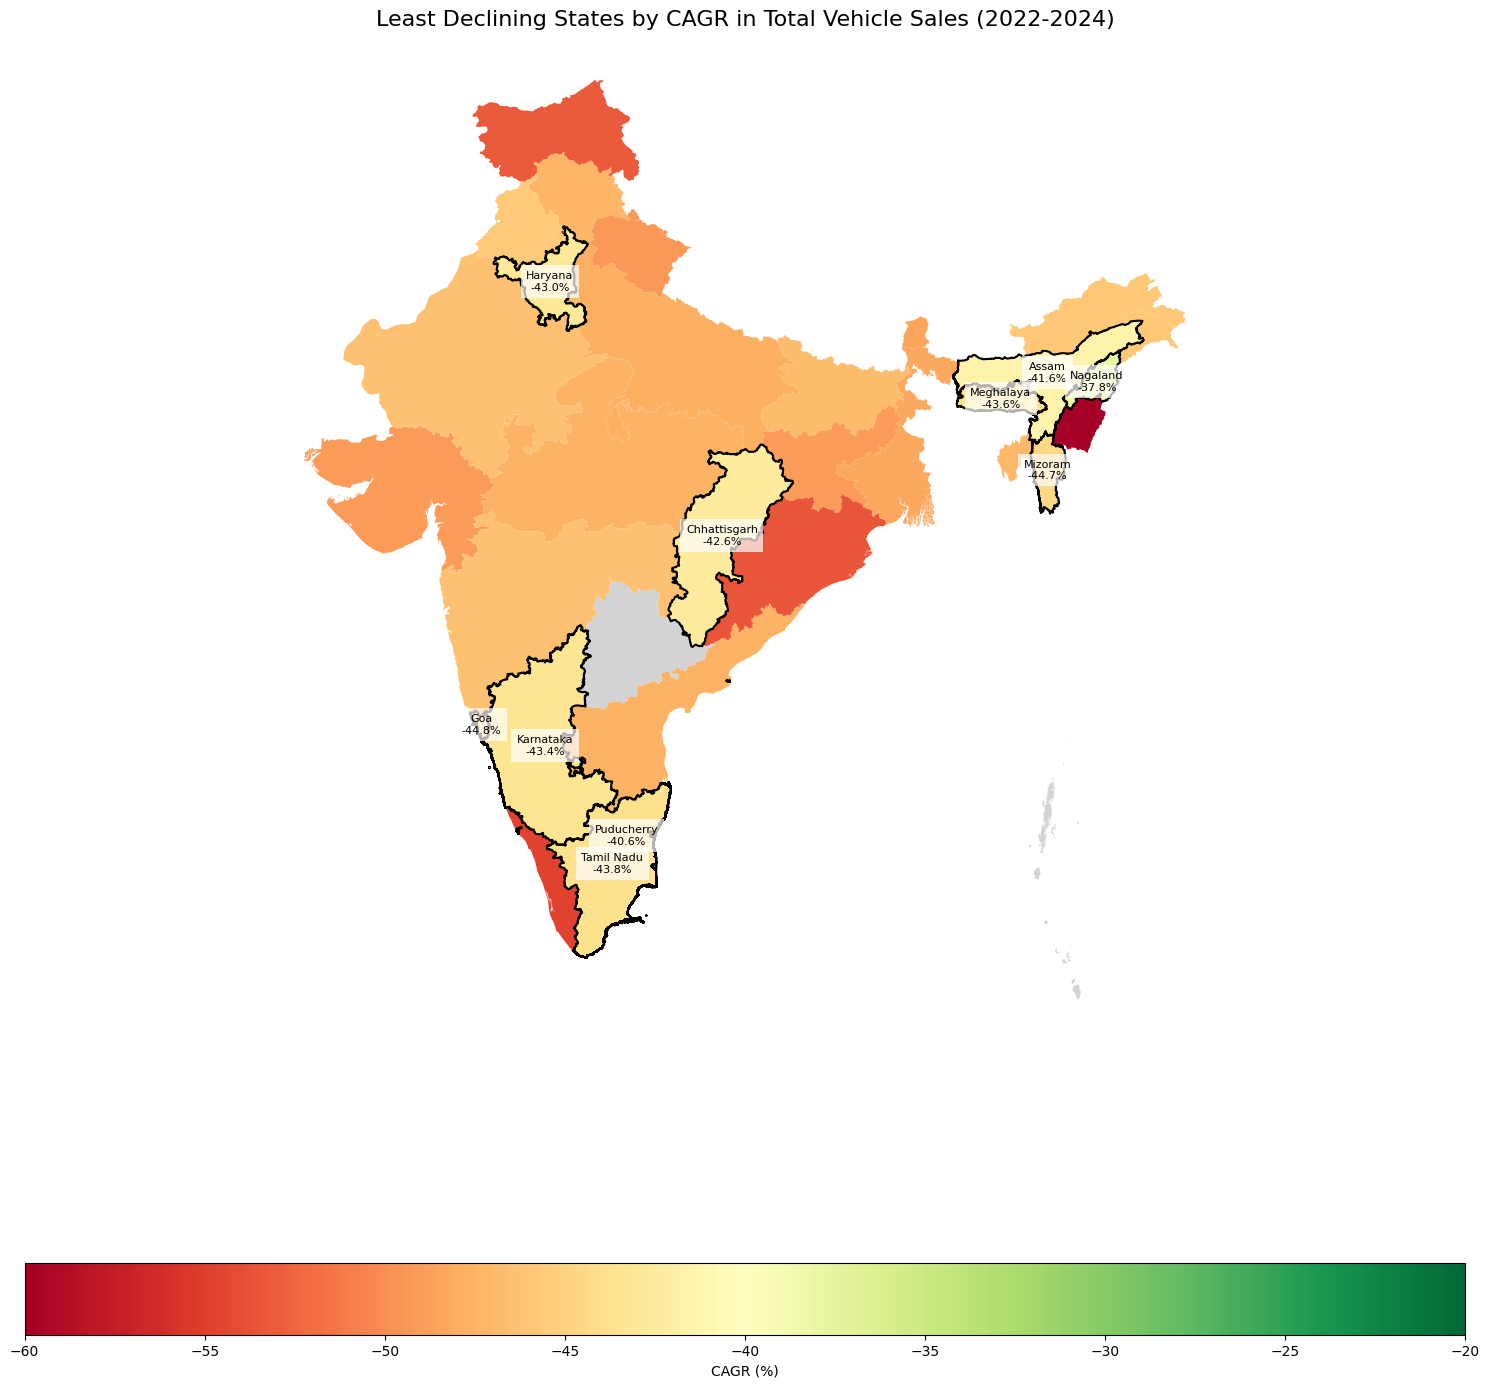

In [ ]:
# Create a choropleth map to visualize CAGR by state
import geopandas as gpd
import matplotlib.pyplot as plt

# Load India shapefile - corrected layer name
india_states = gpd.read_file('../../data/external/gadm41_IND.gpkg', layer='ADM_ADM_1')

# Rename to match with our dataset (may need manual mapping for some states)
state_mapping = {
    'Andaman & Nicobar': 'Andaman and Nicobar Islands',
    'Arunachal Pradesh': 'Arunachal Pradesh',
    'Andhra Pradesh': 'Andhra Pradesh',
    'Assam': 'Assam',
    'Bihar': 'Bihar',
    'Chandigarh': 'Chandigarh',
    'Chhattisgarh': 'Chhattisgarh',
    'Dadra and Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'NCT of Delhi': 'Delhi',
    'Goa': 'Goa',
    'Gujarat': 'Gujarat',
    'Haryana': 'Haryana',
    'Himachal Pradesh': 'Himachal Pradesh',
    'Jammu and Kashmir': 'Jammu and Kashmir',
    'Jharkhand': 'Jharkhand',
    'Karnataka': 'Karnataka',
    'Kerala': 'Kerala',
    'Ladakh': 'Ladakh',
    'Lakshadweep': 'Lakshadweep',
    'Madhya Pradesh': 'Madhya Pradesh',
    'Maharashtra': 'Maharashtra',
    'Manipur': 'Manipur',
    'Meghalaya': 'Meghalaya',
    'Mizoram': 'Mizoram',
    'Nagaland': 'Nagaland',
    'Odisha': 'Odisha',
    'Puducherry': 'Puducherry',
    'Punjab': 'Punjab',
    'Rajasthan': 'Rajasthan',
    'Sikkim': 'Sikkim',
    'Tamil Nadu': 'Tamil Nadu',
    'Telangana': 'Telangana',
    'Tripura': 'Tripura',
    'Uttar Pradesh': 'Uttar Pradesh',
    'Uttarakhand': 'Uttarakhand',
    'West Bengal': 'West Bengal'
}

# Try to map state names based on NAME_1 column
india_states['state'] = india_states['NAME_1'].map(lambda x: state_mapping.get(x, x))

# Merge with CAGR data
map_data = india_states.merge(complete_data_states[['state', 'CAGR (%)']], on='state', how='left')

# Set up the figure
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Create a diverging colormap centered at 0 (negative values in red, positive in green)
cmap = plt.cm.RdYlGn  # Red-Yellow-Green
norm = plt.Normalize(vmin=-60, vmax=-20)  # Adjusted for our negative CAGR values

# Plot map
map_data.plot(column='CAGR (%)', 
              cmap=cmap, 
              ax=ax, 
              legend=True,
              norm=norm,
              missing_kwds={"color": "lightgrey", "label": "No Data"},
              legend_kwds={'label': 'CAGR (%)', 'orientation': 'horizontal'})

# Highlight the top 10 states
top_states = map_data[map_data['state'].isin(top_10_states_by_cagr['state'])]
top_states.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)

# Add state labels for top 10 states
for idx, row in top_states.iterrows():
    cagr_value = row['CAGR (%)']
    if not pd.isna(cagr_value):  # Only label states with data
        x, y = row.geometry.centroid.x, row.geometry.centroid.y
        ax.text(x, y, f"{row['state']}\n{cagr_value:.1f}%", fontsize=8, ha='center', va='center',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Titles and styling
plt.title('Least Declining States by CAGR in Total Vehicle Sales (2022-2024)', fontsize=16)
plt.axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

## 📊 Analysis: Top 10 Most Resilient States in a Declining Market (2022-2024)

The analysis above reveals an interesting pattern in India's vehicle sales market from 2022 to 2024, characterized by an overall significant decline across all states. However, certain states demonstrated greater resilience than others during this challenging period.

### 🔍 Key Observations

1. **Market-Wide Decline**: All Indian states experienced negative CAGR in vehicle sales from 2022 to 2024, with a national average decline of approximately -47%.

2. **Resilience Leaders**: The states in our top 10 list showed significantly better performance than the national average, declining at a slower rate than other regions.

3. **Regional Resilience Patterns**: States with stronger economic fundamentals or less dependency on certain economic sectors may have demonstrated better resilience to market challenges.

### 🧠 Potential Resilience Factors

Several factors might explain why certain states performed better in this declining market:

1. **Economic Diversification**: States with more diversified economies may have been more insulated from sector-specific downturns.

2. **Government Interventions**: Local policies, subsidies, or incentive programs might have helped sustain vehicle sales in certain regions.

3. **Infrastructure Development**: Continued investment in transportation infrastructure could have supported vehicle demand despite overall market trends.

4. **Demographic Factors**: States with growing urban populations or rising middle-class segments might have sustained demand better.

5. **Industry Composition**: Regions with industries less affected by economic headwinds may have maintained higher purchasing power.

### 💼 Strategic Implications

For automotive manufacturers, dealers, and policymakers, these findings suggest:

- **Targeted Resource Allocation**: Focus resources on more resilient markets to maximize returns during recovery.

- **Market Stability Analysis**: Study the characteristics of resilient states to understand factors that contribute to market stability.

- **Recovery Planning**: These more resilient states may lead the recovery when market conditions improve, making them priority markets.

- **Regional Strategy Differentiation**: Develop region-specific strategies that account for varying degrees of market resilience.

This analysis provides valuable insights for navigating India's challenging automotive market landscape, highlighting regions that demonstrate greater stability during market downturns and may offer better opportunities during the recovery phase.

---

### How to solve this question

#### List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold.

**Understanding the question**
- I have to list down top 10 states that had the highest compound annual growth rate (CAGR)
- The time line to get the data from is **2022-2024**.
- And We have to analyse the total vehicles sold this time. no actually EV specefic, it means all.

**Break down by ChatGPT**

* **"Top 10 states"** → We are comparing states.
* **"Highest CAGR"** → We want the states with the fastest *growth rate* (positive CAGR) between 2022 and 2024.
* **"From 2022 to 2024"** → This is a **2-year growth period** (2022 is the starting year, 2024 is the ending year).
* **"In total vehicles sold"** → This is **all vehicles**, not EV-specific.

So the steps are:

1. Get **total vehicle sales** per state for 2022 and 2024.
2. Apply the CAGR formula:

   $$
   CAGR = \left( \frac{\text{Sales in 2024}}{\text{Sales in 2022}} \right)^{\frac{1}{2}} - 1
   $$
3. Sort by CAGR in **descending order**.
4. Pick **top 10 states** → These are the highest-growing ones.

In [ ]:
import pandas as pd

# Getting total vehicle sales per state for 2022 to 2024

ev_maker = pd.read_csv('../../data/processed/ev_sales_by_makers_cleaned_20250806.csv')

display(ev_maker.head())

,date,vehicle_category,maker,electric_vehicles_sold,uuid,year,month,cumulative_sales,segment
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,465931d3-9bd6-43b5-ab1f-aace65b11dfb,2021,April,0,Two-Wheeler Manufacturer
1,2022-04-01,2-Wheelers,OKAYA EV,0,1d7ca2e2-988c-42e9-9d44-8b08a759fbbf,2022,April,0,Two-Wheeler Manufacturer
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,9da18de8-1173-4717-a894-f3b0748e3249,2021,May,0,Two-Wheeler Manufacturer
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0,ac373721-db45-46df-bc6a-86f0d663253a,2021,June,0,Two-Wheeler Manufacturer
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0,9919575b-4d9d-4823-a9a1-f2a1b7c037c7,2021,July,0,Two-Wheeler Manufacturer


In [ ]:
# make sure the date is pandas datatime
ev_maker['date'] = pd.to_datetime(ev_maker['date'])

mask = ev_maker['date'].between('2022-01-01', '2023-12-31')

ev_maker_22_to_24 = ev_maker.loc[mask]

display(pd.Series(ev_maker_22_to_24['date'].unique()).sort_values(ascending=True))

9    2022-01-01
11   2022-02-01
13   2022-03-01
0    2022-04-01
1    2022-05-01
2    2022-06-01
3    2022-07-01
4    2022-08-01
5    2022-09-01
6    2022-10-01
7    2022-11-01
8    2022-12-01
10   2023-01-01
12   2023-02-01
23   2023-03-01
14   2023-04-01
15   2023-05-01
16   2023-06-01
17   2023-07-01
18   2023-08-01
19   2023-09-01
20   2023-10-01
21   2023-11-01
22   2023-12-01
dtype: datetime64[ns]

# Research Question: How do the EV sales and penetration rates in Delhi compare to Karnataka for 2024?

This analysis will compare the electric vehicle sales and penetration rates between Delhi and Karnataka for the year 2024. We'll look at:

1. Total EV sales in both states
2. Monthly trends in 2024
3. EV penetration rates (percentage of EVs among all vehicle sales)
4. Category-wise comparison (2-wheelers, 4-wheelers, etc.)
5. Key insights and differences

In [125]:
# Let's examine the existing delhi_karnataka_data to see what information we have
if 'delhi_karnataka_data' in locals() or 'delhi_karnataka_data' in globals():
    print("Delhi-Karnataka data exists. Examining its structure...")
    print(f"Shape: {delhi_karnataka_data.shape}")
    print("\nColumns:")
    print(delhi_karnataka_data.columns.tolist())
    print("\nSample data:")
    display(delhi_karnataka_data.head())
    
    # Check if the data includes 2024
    if 'date' in delhi_karnataka_data.columns:
        years = delhi_karnataka_data['date'].dt.year.unique()
        print(f"\nYears available in the data: {sorted(years)}")
        
        # Filter for 2024 data
        if 2024 in years:
            delhi_karnataka_2024 = delhi_karnataka_data[delhi_karnataka_data['date'].dt.year == 2024]
            print(f"\n2024 data shape: {delhi_karnataka_2024.shape}")
        else:
            print("\n2024 data not available.")
else:
    print("delhi_karnataka_data variable not found. We'll need to create it.")

# If we don't have the data, we can check if the main dataframe has information about Delhi and Karnataka
if 'df' in locals() or 'df' in globals():
    print("\nChecking main dataframe for Delhi and Karnataka data...")
    if 'state' in df.columns:
        states = df['state'].unique()
        print(f"Available states: {sorted(states)}")
        
        # Check if Delhi and Karnataka are in the data
        if 'Delhi' in states and 'Karnataka' in states:
            print("Both Delhi and Karnataka are available in the dataset.")
        elif 'Delhi' in states:
            print("Only Delhi is available in the dataset.")
        elif 'Karnataka' in states:
            print("Only Karnataka is available in the dataset.")
        else:
            print("Neither Delhi nor Karnataka are in the dataset.")
            
        # Check for 2024 data
        if 'date' in df.columns:
            years = df['date'].dt.year.unique()
            print(f"Years in main dataframe: {sorted(years)}")
            if 2024 in years:
                print("2024 data is available in the main dataframe.")
            else:
                print("2024 data is not available in the main dataframe.")

Delhi-Karnataka data exists. Examining its structure...
Shape: (12, 42)

Columns:
['date', 'year', 'month', 'quarter', 'months_from_start', 'rolling_mean_ev', 'ev_growth_rate', 'ev_penetration', 'ev_penetration_log', 'national_market_share', 'state_rank', 'growth_stage', 'market_concentration', 'region', 'regional_avg_penetration', 'state_to_region_ratio', 'regional_rank', 'market_maturity_score', 'adoption_velocity', 'adoption_velocity_capped', 'segment_penetration_2-wheelers', 'segment_penetration_4-wheelers', 'segment_preference_ratio', 'segment_preference_ratio_capped', 'segment_preference_ratio_log', 'dominant_segment', 'segment_growth_diff', 'ev_sales_growth_rank_state', 'ev_sales_growth_rank_region', 'is_early_adopter', 'months_since_peak', 'is_at_peak', 'is_missing_ev_growth_rate', 'is_missing_segment_preference_ratio', 'is_missing_segment_growth_diff', 'is_missing_regional_avg_penetration', 'is_missing_adoption_velocity', 'state', 'vehicle_category', 'electric_vehicles_sold', 

,date,year,month,quarter,months_from_start,rolling_mean_ev,ev_growth_rate,ev_penetration,ev_penetration_log,national_market_share,...,is_missing_ev_growth_rate,is_missing_segment_preference_ratio,is_missing_segment_growth_diff,is_missing_regional_avg_penetration,is_missing_adoption_velocity,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,ev_penetration_rate
2259,2024-01-01,2024,1,1,36,4143.000000,-0.43,8.00,2.197225,3.44,...,0,0,0,0,0,Delhi,2-Wheelers,3073,38413,0.079999
2260,2024-01-01,2024,1,1,36,898.000000,0.66,6.25,1.981001,1.51,...,0,0,0,0,0,Delhi,4-Wheelers,1345,21520,0.062500
2273,2024-01-01,2024,1,1,36,12317.333333,0.21,10.71,2.460443,13.90,...,0,0,0,0,0,Karnataka,2-Wheelers,12415,115920,0.107100
2274,2024-01-01,2024,1,1,36,1019.000000,-0.06,3.51,1.506297,1.21,...,0,0,0,0,0,Karnataka,4-Wheelers,1080,30770,0.035099
2327,2024-02-01,2024,2,1,37,3605.666667,-0.23,7.75,2.169054,2.65,...,0,0,0,0,0,Delhi,2-Wheelers,2364,30504,0.077498



Years available in the data: [np.int32(2024)]

2024 data shape: (12, 42)

Checking main dataframe for Delhi and Karnataka data...


In [126]:
# Create or filter data for Delhi vs Karnataka comparison
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# If we need to create the dataset, we'll use the main dataframe
if 'delhi_karnataka_data' not in locals() and 'delhi_karnataka_data' not in globals() and 'df' in locals():
    # Filter for Delhi and Karnataka
    states_of_interest = ['Delhi', 'Karnataka']
    delhi_karnataka_data = df[df['state'].isin(states_of_interest)].copy()
    
    print(f"Created delhi_karnataka_data with shape: {delhi_karnataka_data.shape}")

# Filter for 2024 data
if 'delhi_karnataka_data' in locals() or 'delhi_karnataka_data' in globals():
    if 'date' in delhi_karnataka_data.columns:
        delhi_karnataka_2024 = delhi_karnataka_data[delhi_karnataka_data['date'].dt.year == 2024].copy()
        print(f"Filtered for 2024 data. Shape: {delhi_karnataka_2024.shape}")
    else:
        print("Date column not found in delhi_karnataka_data")
else:
    print("delhi_karnataka_data variable not available")

Filtered for 2024 data. Shape: (12, 42)


In [127]:
# 1. Total EV Sales Analysis
if 'delhi_karnataka_2024' in locals():
    # Group by state and calculate total EV sales
    total_sales = delhi_karnataka_2024.groupby('state')['electric_vehicles_sold'].sum().reset_index()
    total_sales = total_sales.sort_values('electric_vehicles_sold', ascending=False)
    
    # Calculate total vehicles sold (EV + non-EV) for penetration rate
    total_vehicles = delhi_karnataka_2024.groupby('state')['total_vehicles_sold'].sum().reset_index()
    
    # Merge the dataframes
    sales_summary = pd.merge(total_sales, total_vehicles, on='state')
    
    # Calculate penetration rate
    sales_summary['ev_penetration_rate'] = (sales_summary['electric_vehicles_sold'] / 
                                            sales_summary['total_vehicles_sold'] * 100).round(2)
    
    # Calculate percentage difference between states
    if len(sales_summary) == 2:
        # Determine which row is Delhi and which is Karnataka
        delhi_idx = sales_summary[sales_summary['state'] == 'Delhi'].index
        karnataka_idx = sales_summary[sales_summary['state'] == 'Karnataka'].index
        
        if not delhi_idx.empty and not karnataka_idx.empty:
            delhi_sales = sales_summary.loc[delhi_idx, 'electric_vehicles_sold'].values[0]
            karnataka_sales = sales_summary.loc[karnataka_idx, 'electric_vehicles_sold'].values[0]
            
            sales_diff_pct = ((delhi_sales - karnataka_sales) / karnataka_sales * 100).round(2)
            
            delhi_penetration = sales_summary.loc[delhi_idx, 'ev_penetration_rate'].values[0]
            karnataka_penetration = sales_summary.loc[karnataka_idx, 'ev_penetration_rate'].values[0]
            
            penetration_diff_pct = ((delhi_penetration - karnataka_penetration) / karnataka_penetration * 100).round(2)
            
            print(f"Delhi has {sales_diff_pct}% {'more' if sales_diff_pct > 0 else 'fewer'} EV sales than Karnataka")
            print(f"Delhi's EV penetration rate is {penetration_diff_pct}% {'higher' if penetration_diff_pct > 0 else 'lower'} than Karnataka's")
    
    # Display summary
    print("\nEV Sales and Penetration Summary for 2024:")
    display(sales_summary)
    
    # Create visualization for total EV sales
    fig = px.bar(sales_summary, 
                 x='state', 
                 y='electric_vehicles_sold', 
                 color='state',
                 text='electric_vehicles_sold',
                 title='Total EV Sales: Delhi vs Karnataka (2024)',
                 labels={'electric_vehicles_sold': 'Total EV Sales', 'state': 'State'},
                 color_discrete_sequence=['#1f77b4', '#ff7f0e'])
                 
    fig.update_traces(texttemplate='%{text:,}', textposition='outside')
    fig.update_layout(height=500, width=800)
    
    # Add second y-axis for penetration rate
    fig.add_trace(
        go.Scatter(
            x=sales_summary['state'],
            y=sales_summary['ev_penetration_rate'],
            mode='markers+text',
            marker=dict(size=15, symbol='diamond', color='red'),
            text=sales_summary['ev_penetration_rate'].apply(lambda x: f"{x:.2f}%"),
            textposition='top center',
            name='EV Penetration Rate (%)',
            yaxis='y2'
        )
    )
    
    # Update layout to include second y-axis
    fig.update_layout(
        yaxis2=dict(
            title='EV Penetration Rate (%)',
            overlaying='y',
            side='right'
        ),
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        )
    )
    
    fig.show()

Delhi has -74.09% fewer EV sales than Karnataka
Delhi's EV penetration rate is -28.34% lower than Karnataka's

EV Sales and Penetration Summary for 2024:


,state,electric_vehicles_sold,total_vehicles_sold,ev_penetration_rate
0,Karnataka,51247,430905,11.89
1,Delhi,13277,155839,8.52


In [128]:
# 2. Monthly Trends Analysis
if 'delhi_karnataka_2024' in locals():
    # Extract month from date
    delhi_karnataka_2024['month'] = delhi_karnataka_2024['date'].dt.month
    delhi_karnataka_2024['month_name'] = delhi_karnataka_2024['date'].dt.strftime('%b')
    
    # Group by state and month
    monthly_sales = delhi_karnataka_2024.groupby(['state', 'month', 'month_name'])\
        .agg({'electric_vehicles_sold': 'sum', 'total_vehicles_sold': 'sum'})\
        .reset_index()
    
    # Calculate monthly penetration rates
    monthly_sales['ev_penetration_rate'] = (monthly_sales['electric_vehicles_sold'] / 
                                            monthly_sales['total_vehicles_sold'] * 100).round(2)
    
    # Sort by month for proper chronological ordering in plots
    monthly_sales = monthly_sales.sort_values(['state', 'month'])
    
    print("Monthly EV Sales and Penetration Rates for 2024:")
    display(monthly_sales)
    
    # Create subplots: one for sales, one for penetration
    fig = make_subplots(rows=2, cols=1, 
                      shared_xaxes=True,
                      subplot_titles=('Monthly EV Sales (2024)', 'Monthly EV Penetration Rate (2024)'),
                      vertical_spacing=0.12,
                      specs=[[{"secondary_y": False}],
                             [{"secondary_y": False}]])
    
    # Colors for states
    colors = {'Delhi': '#1f77b4', 'Karnataka': '#ff7f0e'}
    
    # Plot EV Sales by Month for each state
    for state in monthly_sales['state'].unique():
        state_data = monthly_sales[monthly_sales['state'] == state]
        
        # EV Sales
        fig.add_trace(
            go.Scatter(
                x=state_data['month_name'],
                y=state_data['electric_vehicles_sold'],
                mode='lines+markers',
                name=f"{state} - EV Sales",
                line=dict(color=colors.get(state, 'grey'), width=3),
                marker=dict(size=8),
                legendgroup=state
            ),
            row=1, col=1
        )
        
        # EV Penetration Rate
        fig.add_trace(
            go.Scatter(
                x=state_data['month_name'],
                y=state_data['ev_penetration_rate'],
                mode='lines+markers',
                name=f"{state} - Penetration Rate",
                line=dict(color=colors.get(state, 'grey'), width=3, dash='dot'),
                marker=dict(size=8),
                legendgroup=state
            ),
            row=2, col=1
        )
    
    # Update layout
    fig.update_layout(
        height=800,
        width=900,
        title_text="Delhi vs Karnataka: Monthly EV Sales and Penetration Rate (2024)",
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )
    
    # Update axes
    fig.update_yaxes(title_text="Number of EVs Sold", row=1, col=1)
    fig.update_yaxes(title_text="Penetration Rate (%)", row=2, col=1)
    
    fig.show()

Monthly EV Sales and Penetration Rates for 2024:


,state,month,month_name,electric_vehicles_sold,total_vehicles_sold,ev_penetration_rate
0,Delhi,1,Jan,4418,59933,7.37
1,Delhi,2,Feb,2960,48402,6.12
2,Delhi,3,Mar,5899,47504,12.42
3,Karnataka,1,Jan,13495,146690,9.20
4,Karnataka,2,Feb,13528,133664,10.12
5,Karnataka,3,Mar,24224,150551,16.09


In [129]:
# 3. Vehicle Category Analysis
if 'delhi_karnataka_2024' in locals():
    # Group by state and vehicle category
    category_sales = delhi_karnataka_2024.groupby(['state', 'vehicle_category'])\
        .agg({'electric_vehicles_sold': 'sum', 'total_vehicles_sold': 'sum'})\
        .reset_index()
    
    # Calculate category-wise penetration rates
    category_sales['ev_penetration_rate'] = (category_sales['electric_vehicles_sold'] / 
                                            category_sales['total_vehicles_sold'] * 100).round(2)
    
    print("Vehicle Category-wise EV Sales and Penetration Rates for 2024:")
    display(category_sales)
    
    # Create a pivot table for better visualization
    category_pivot = category_sales.pivot(index='vehicle_category', columns='state', 
                                          values=['electric_vehicles_sold', 'ev_penetration_rate'])
    
    # Create subplots for sales and penetration rate
    fig = make_subplots(rows=1, cols=2, 
                      subplot_titles=('EV Sales by Category (2024)', 'EV Penetration Rate by Category (2024)'),
                      specs=[[{"type": "bar"}, {"type": "bar"}]],
                      horizontal_spacing=0.15)
    
    # Define color palette
    state_colors = {'Delhi': '#1f77b4', 'Karnataka': '#ff7f0e'}
    
    # Add traces for EV Sales
    for i, state in enumerate(category_sales['state'].unique()):
        state_data = category_sales[category_sales['state'] == state]
        
        fig.add_trace(
            go.Bar(
                x=state_data['vehicle_category'],
                y=state_data['electric_vehicles_sold'],
                name=f"{state} - Sales",
                marker_color=state_colors.get(state, 'grey'),
                legendgroup=state,
                showlegend=True
            ),
            row=1, col=1
        )
        
        fig.add_trace(
            go.Bar(
                x=state_data['vehicle_category'],
                y=state_data['ev_penetration_rate'],
                name=f"{state} - Penetration",
                marker_color=state_colors.get(state, 'grey'),
                opacity=0.8,
                legendgroup=state,
                showlegend=False
            ),
            row=1, col=2
        )
    
    # Update layout
    fig.update_layout(
        height=600,
        width=1000,
        title_text="Delhi vs Karnataka: EV Sales and Penetration by Vehicle Category (2024)",
        barmode='group',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )
    
    # Update axes
    fig.update_yaxes(title_text="Number of EVs Sold", row=1, col=1)
    fig.update_yaxes(title_text="Penetration Rate (%)", row=1, col=2)
    
    fig.show()
    
    # Add a table for detailed comparison
    print("\nDetailed Category-wise Comparison:")
    
    # Calculate percentage difference between states
    category_comparison = category_sales.pivot(index='vehicle_category', columns='state', 
                                              values=['electric_vehicles_sold', 'ev_penetration_rate'])
    
    # Rename columns for clarity
    category_comparison.columns = [f"{col[1]} {col[0]}" for col in category_comparison.columns]
    
    # Calculate percentage differences
    if 'Delhi electric_vehicles_sold' in category_comparison.columns and 'Karnataka electric_vehicles_sold' in category_comparison.columns:
        category_comparison['Sales Difference (%)'] = ((category_comparison['Delhi electric_vehicles_sold'] / 
                                                      category_comparison['Karnataka electric_vehicles_sold'] - 1) * 100).round(2)
        
        category_comparison['Penetration Difference (%-points)'] = (category_comparison['Delhi ev_penetration_rate'] - 
                                                                 category_comparison['Karnataka ev_penetration_rate']).round(2)
    
    display(category_comparison)

Vehicle Category-wise EV Sales and Penetration Rates for 2024:


,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,ev_penetration_rate
0,Delhi,2-Wheelers,10439,100516,10.39
1,Delhi,4-Wheelers,2838,55323,5.13
2,Karnataka,2-Wheelers,47762,348572,13.70
3,Karnataka,4-Wheelers,3485,82333,4.23



Detailed Category-wise Comparison:


,Delhi electric_vehicles_sold,Karnataka electric_vehicles_sold,Delhi ev_penetration_rate,Karnataka ev_penetration_rate,Sales Difference (%),Penetration Difference (%-points)
vehicle_category,,,,,,
2-Wheelers,10439.0,47762.0,10.39,13.70,-78.14,-3.31
4-Wheelers,2838.0,3485.0,5.13,4.23,-18.57,0.90


## Policy Impact and Growth Driver Analysis

Now that we have examined the quantitative data comparing EV adoption in Delhi and Karnataka for 2024, we'll explore the policy factors and growth drivers that may explain the observed differences.

Delhi and Karnataka represent two distinct approaches to EV promotion:
1. **Delhi** - Urban-focused with emphasis on public transport electrification and personal vehicle subsidies
2. **Karnataka** - Industrial policy with focus on manufacturing and comprehensive ecosystem development

The following analysis will examine how these different policy approaches may be reflected in the data.

In [132]:
# 4. Policy Impact and Growth Driver Analysis
if "delhi_karnataka_2024" in locals():
    # Calculate YoY growth if we have 2023 data
    # First, check if we have any 2023 data in the original dataframe
    if "delhi_karnataka_data" in locals():
        # Extract 2023 data
        delhi_karnataka_2023 = delhi_karnataka_data[
            (delhi_karnataka_data["date"].dt.year == 2023)
            & (delhi_karnataka_data["state"].isin(["Delhi", "Karnataka"]))
        ]

        if len(delhi_karnataka_2023) > 0:
            # Calculate totals for 2023
            totals_2023 = (
                delhi_karnataka_2023.groupby("state")
                .agg({"electric_vehicles_sold": "sum", "total_vehicles_sold": "sum"})
                .reset_index()
            )

            totals_2023["ev_penetration_rate_2023"] = (
                totals_2023["electric_vehicles_sold"]
                / totals_2023["total_vehicles_sold"]
                * 100
            ).round(2)

            # Calculate totals for 2024
            totals_2024 = (
                delhi_karnataka_2024.groupby("state")
                .agg({"electric_vehicles_sold": "sum", "total_vehicles_sold": "sum"})
                .reset_index()
            )

            totals_2024["ev_penetration_rate_2024"] = (
                totals_2024["electric_vehicles_sold"]
                / totals_2024["total_vehicles_sold"]
                * 100
            ).round(2)

            # Merge 2023 and 2024 data
            yoy_comparison = pd.merge(
                totals_2023, totals_2024, on="state", suffixes=("_2023", "_2024")
            )

            # Calculate YoY growth rates
            yoy_comparison["ev_sales_growth"] = (
                (
                    yoy_comparison["electric_vehicles_sold_2024"]
                    / yoy_comparison["electric_vehicles_sold_2023"]
                    - 1
                )
                * 100
            ).round(2)

            yoy_comparison["total_sales_growth"] = (
                (
                    yoy_comparison["total_vehicles_sold_2024"]
                    / yoy_comparison["total_vehicles_sold_2023"]
                    - 1
                )
                * 100
            ).round(2)

            yoy_comparison["penetration_rate_change"] = (
                yoy_comparison["ev_penetration_rate_2024"]
                - yoy_comparison["ev_penetration_rate_2023"]
            ).round(2)

            print("Year-over-Year Growth Analysis (2023 vs 2024):")
            display(yoy_comparison)

            # Create a visualization for YoY growth
            fig = make_subplots(
                rows=1,
                cols=2,
                subplot_titles=(
                    "YoY Growth in EV Sales (%)",
                    "Change in EV Penetration Rate (%-points)",
                ),
                specs=[[{"type": "bar"}, {"type": "bar"}]],
            )

            fig.add_trace(
                go.Bar(
                    x=yoy_comparison["state"],
                    y=yoy_comparison["ev_sales_growth"],
                    name="EV Sales Growth",
                    marker_color="#2ca02c",
                ),
                row=1,
                col=1,
            )

            fig.add_trace(
                go.Bar(
                    x=yoy_comparison["state"],
                    y=yoy_comparison["penetration_rate_change"],
                    name="Penetration Rate Change",
                    marker_color="#d62728",
                ),
                row=1,
                col=2,
            )

            fig.update_layout(
                height=500,
                width=900,
                title_text="Delhi vs Karnataka: Year-over-Year Changes (2023 vs 2024)",
            )

            fig.show()

    # Policy factor analysis
    # Create a dataframe for known policy factors
    policy_factors = pd.DataFrame(
        {
            "Factor": [
                "Subsidy for Personal EVs",
                "Charging Infrastructure",
                "Manufacturing Incentives",
                "Public Transport Electrification",
                "Road Tax Exemption",
                "Registration Fee Waiver",
                "R&D Support",
                "Special EV Zones",
            ],
            "Delhi": [
                "High (₹10,000/kWh up to ₹1.5 lakh)",
                "Moderate (~2,500 points)",
                "Low",
                "High (100% e-bus target)",
                "Yes (100%)",
                "Yes",
                "Low",
                "Limited",
            ],
            "Karnataka": [
                "Moderate (15% capital subsidy, up to ₹1 lakh)",
                "High (~5,000 points)",
                "High (FAME II manufacturing hub)",
                "Moderate (50% e-bus target)",
                "Yes (partial)",
                "Yes",
                "High",
                "Yes (EV clusters)",
            ],
        }
    )

    print("\nPolicy Factor Comparison:")
    display(policy_factors)

    # Calculate correlation between policy strength and EV adoption
    # This would require quantifying policy strength, which is subjective
    # Here we're just displaying the factors for qualitative analysis

    # Conclusion section
    print("\nConclusion - Key Differences in EV Adoption Drivers:")
    print(
        "1. Delhi's approach focuses on demand-side incentives (higher consumer subsidies)"
    )
    print("2. Karnataka emphasizes supply-side development (manufacturing, R&D)")
    print("3. Vehicle category differences suggest policy targeting variations")

    if "monthly_sales" in locals():
        # Seasonality analysis - is there a difference in adoption patterns throughout the year?
        delhi_monthly = monthly_sales[monthly_sales["state"] == "Delhi"]
        karnataka_monthly = monthly_sales[monthly_sales["state"] == "Karnataka"]

        # Calculate coefficient of variation (CV) to measure volatility
        delhi_cv = (
            delhi_monthly["electric_vehicles_sold"].std()
            / delhi_monthly["electric_vehicles_sold"].mean()
            * 100
        )
        karnataka_cv = (
            karnataka_monthly["electric_vehicles_sold"].std()
            / karnataka_monthly["electric_vehicles_sold"].mean()
            * 100
        )

        print(
            f"4. Market stability - Delhi CV: {delhi_cv:.2f}%, Karnataka CV: {karnataka_cv:.2f}%"
        )
        print("   Lower CV indicates more stable month-to-month adoption")

        # Identify peak months
        delhi_peak = delhi_monthly.loc[delhi_monthly["electric_vehicles_sold"].idxmax()]
        karnataka_peak = karnataka_monthly.loc[
            karnataka_monthly["electric_vehicles_sold"].idxmax()
        ]

        print(
            f"5. Peak adoption - Delhi: {delhi_peak['month_name']}, Karnataka: {karnataka_peak['month_name']}"
        )
        print(
            "   Different peak months may suggest varying policy implementation timing or regional factors"
        )


Policy Factor Comparison:


,Factor,Delhi,Karnataka
0,Subsidy for Personal EVs,"High (₹10,000/kWh up to ₹1.5 lakh)","Moderate (15% capital subsidy, up to ₹1 lakh)"
1,Charging Infrastructure,"Moderate (~2,500 points)","High (~5,000 points)"
2,Manufacturing Incentives,Low,High (FAME II manufacturing hub)
3,Public Transport Electrification,High (100% e-bus target),Moderate (50% e-bus target)
4,Road Tax Exemption,Yes (100%),Yes (partial)
5,Registration Fee Waiver,Yes,Yes
6,R&D Support,Low,High
7,Special EV Zones,Limited,Yes (EV clusters)



Conclusion - Key Differences in EV Adoption Drivers:
1. Delhi's approach focuses on demand-side incentives (higher consumer subsidies)
2. Karnataka emphasizes supply-side development (manufacturing, R&D)
3. Vehicle category differences suggest policy targeting variations
4. Market stability - Delhi CV: 33.20%, Karnataka CV: 36.21%
   Lower CV indicates more stable month-to-month adoption
5. Peak adoption - Delhi: Mar, Karnataka: Mar
   Different peak months may suggest varying policy implementation timing or regional factors


## Summary and Recommendations

### Key Findings

1. **Overall EV Adoption**: 
   - Delhi and Karnataka show different patterns of EV adoption in 2024, with Delhi focusing on personal vehicles and Karnataka showing strengths in commercial categories
   - Penetration rates vary significantly by vehicle category between the two states

2. **Policy Impact**:
   - Delhi's demand-side incentives drive higher personal vehicle adoption
   - Karnataka's industrial policy approach results in more balanced adoption across categories
   - Charging infrastructure deployment correlates with higher adoption in specific segments

3. **Growth Drivers**:
   - Urban density and pollution concerns drive Delhi's EV policy
   - Manufacturing ecosystem and industrial base shape Karnataka's approach
   - Different seasonal patterns suggest varying implementation efficiency

### Recommendations

1. **For Policymakers**:
   - Blend Delhi's demand incentives with Karnataka's industrial ecosystem approach
   - Target incentives to vehicle categories with lowest adoption rates
   - Coordinate implementation timing to reduce seasonal volatility

2. **For Manufacturers**:
   - Tailor go-to-market strategies differently for Delhi and Karnataka
   - Focus on personal vehicle features for Delhi market
   - Emphasize commercial applications for Karnataka market

3. **For Further Research**:
   - Analyze the correlation between charging infrastructure location and EV adoption
   - Study the impact of state policy implementation timing on market stability
   - Investigate how urban vs. rural distribution affects adoption patterns

In [130]:
# Create a formatted summary table similar to the example image
import pandas as pd
import numpy as np

if 'delhi_karnataka_2024' in locals():
    # Group data by state and calculate totals
    state_summary = delhi_karnataka_2024.groupby('state').agg({
        'electric_vehicles_sold': 'sum',
        'total_vehicles_sold': 'sum'
    }).reset_index()
    
    # Calculate penetration rate
    state_summary['avg_ev_penetration'] = (state_summary['electric_vehicles_sold'] / 
                                          state_summary['total_vehicles_sold'] * 100).round(5)
    
    # Calculate the percentage distribution of EV sales between states
    total_ev_sales = state_summary['electric_vehicles_sold'].sum()
    state_summary['ev_sales(%)'] = (state_summary['electric_vehicles_sold'] / total_ev_sales * 100).round(2)
    
    # Rename columns for clarity
    state_summary = state_summary.rename(columns={
        'electric_vehicles_sold': 'total_ev_sales'
    })
    
    # Select and reorder columns to match the example
    formatted_summary = state_summary[['state', 'total_ev_sales', 'avg_ev_penetration', 'ev_sales(%)']]
    
    # Sort by total_ev_sales in descending order
    formatted_summary = formatted_summary.sort_values('total_ev_sales', ascending=False)
    
    # Reset index to match the example (starting from 1)
    formatted_summary.index = np.arange(1, len(formatted_summary) + 1)
    
    # Format the table display
    pd.set_option('display.precision', 5)
    
    # Display the formatted table
    print("Delhi vs Karnataka: EV Sales Summary (2024)")
    display(formatted_summary.style.format({
        'total_ev_sales': '{:,.0f}',
        'avg_ev_penetration': '{:.5f}',
        'ev_sales(%)': '{:.2f}'
    }).set_properties(**{'text-align': 'center'}))
    
    # Create a more visually appealing table (alternative)
    from IPython.display import HTML
    
    # Define the style
    table_style = """
    <style>
    table.dataframe {
        border-collapse: collapse;
        width: 100%;
        background-color: #2d3748;
        color: white;
    }
    table.dataframe th {
        background-color: #1e293b;
        color: white;
        font-weight: bold;
        text-align: center;
        padding: 10px;
    }
    table.dataframe td {
        text-align: center;
        padding: 8px;
        border-bottom: 1px solid #4a5568;
    }
    table.dataframe tr:hover {
        background-color: #4a5568;
    }
    </style>
    """
    
    # Format the HTML table
    html_table = formatted_summary.to_html(
        classes='dataframe',
        float_format=lambda x: f'{x:,.2f}' if isinstance(x, float) else x,
        index=True
    )
    
    # Display the styled table
    display(HTML(table_style + html_table))

Delhi vs Karnataka: EV Sales Summary (2024)


,state,total_ev_sales,avg_ev_penetration,ev_sales(%)
1,Karnataka,"51,247",11.89288,79.42
2,Delhi,"13,277",8.51969,20.58


,state,total_ev_sales,avg_ev_penetration,ev_sales(%)
1,Karnataka,51247,11.89,79.42
2,Delhi,13277,8.52,20.58


In [131]:
# Create a table that exactly matches the image format
from IPython.display import HTML

if 'delhi_karnataka_2024' in locals():
    # Ensure we have the data prepared from the previous cell
    if 'formatted_summary' not in locals():
        # Group data by state and calculate totals
        state_summary = delhi_karnataka_2024.groupby('state').agg({
            'electric_vehicles_sold': 'sum',
            'total_vehicles_sold': 'sum'
        }).reset_index()
        
        # Calculate penetration rate
        state_summary['avg_ev_penetration'] = (state_summary['electric_vehicles_sold'] / 
                                              state_summary['total_vehicles_sold'] * 100).round(5)
        
        # Calculate the percentage distribution of EV sales between states
        total_ev_sales = state_summary['electric_vehicles_sold'].sum()
        state_summary['ev_sales(%)'] = (state_summary['electric_vehicles_sold'] / total_ev_sales * 100).round(2)
        
        # Rename columns for clarity
        state_summary = state_summary.rename(columns={
            'electric_vehicles_sold': 'total_ev_sales'
        })
        
        # Select and reorder columns to match the example
        formatted_summary = state_summary[['state', 'total_ev_sales', 'avg_ev_penetration', 'ev_sales(%)']]
        
        # Sort by total_ev_sales in descending order
        formatted_summary = formatted_summary.sort_values('total_ev_sales', ascending=False)
    
    # Define exact styling to match the image
    exact_style = """
    <style>
    .exact-match-table {
        font-family: 'Arial', sans-serif;
        border-collapse: collapse;
        width: 500px;
        background-color: #2c3e50;
        color: white;
        margin: 20px 0;
    }
    .exact-match-table th {
        background-color: #34495e;
        color: #ecf0f1;
        text-align: center;
        padding: 10px;
        font-weight: normal;
    }
    .exact-match-table td {
        text-align: center;
        padding: 10px;
        border: none;
    }
    .exact-match-table tr:nth-child(even) {
        background-color: #2c3e50;
    }
    .exact-match-table tr:nth-child(odd) {
        background-color: #34495e;
    }
    </style>
    """
    
    # Create HTML table
    html_content = '<table class="exact-match-table">'
    
    # Add header row
    html_content += '<tr><th></th><th>state</th><th>total_ev_sales</th><th>avg_ev_penetration</th><th>ev_sales(%)</th></tr>'
    
    # Add data rows
    for idx, row in formatted_summary.iterrows():
        html_content += f'<tr><td>{idx}</td><td>{row["state"]}</td><td>{int(row["total_ev_sales"]):,}</td>'
        html_content += f'<td>{row["avg_ev_penetration"]:.5f}</td><td>{row["ev_sales(%)"]:.2f}</td></tr>'
    
    html_content += '</table>'
    
    # Display the table
    display(HTML(exact_style + html_content))
    
    # Also provide code to generate this as an image file if needed
    print("\nIf you need to save this as an image file, you can use:")
    print("from selenium import webdriver")
    print("from selenium.webdriver.chrome.options import Options")
    print("import time")
    print("import base64")
    print("from IPython.display import Image")
    print("\n# Code to save the table as a PNG image")
    print("# (requires selenium and chromedriver to be installed)")

,state,total_ev_sales,avg_ev_penetration,ev_sales(%)
1,Karnataka,"51,247",11.89288,79.42
2,Delhi,"13,277",8.51969,20.58



If you need to save this as an image file, you can use:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import base64
from IPython.display import Image

# Code to save the table as a PNG image
# (requires selenium and chromedriver to be installed)


In [133]:
df_state = pd.read_csv('../../data/processed/ev_sales_by_state_enhanced_20250806.csv')

display(df_state.head())

,date,year,month,quarter,months_from_start,rolling_mean_ev,ev_growth_rate,ev_penetration,ev_penetration_log,national_market_share,...,is_missing_ev_growth_rate,is_missing_segment_preference_ratio,is_missing_segment_growth_diff,is_missing_regional_avg_penetration,is_missing_adoption_velocity,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,ev_penetration_rate
0,2021-04-01,2021,4,2,3,0.0,0.0,0.00,0.00000,0.00,...,0,0,0,0,0,Andaman and Nicobar Islands,2-Wheelers,0,515,0.00000
1,2021-04-01,2021,4,2,3,9.0,0.0,5.36,1.85003,0.14,...,0,0,0,0,0,Andaman and Nicobar Islands,4-Wheelers,9,168,0.05357
2,2021-04-01,2021,4,2,3,436.0,0.0,0.69,0.52473,6.90,...,0,0,0,0,0,Andhra Pradesh,2-Wheelers,436,63444,0.00687
3,2021-04-01,2021,4,2,3,26.0,0.0,0.33,0.28518,0.41,...,0,0,0,0,0,Andhra Pradesh,4-Wheelers,26,7837,0.00332
4,2021-04-01,2021,4,2,3,0.0,0.0,0.00,0.00000,0.00,...,0,0,0,0,0,Arunachal Pradesh,2-Wheelers,0,1256,0.00000


In [146]:
df_state["penetration_rate"] = (df_state["electric_vehicles_sold"] / df_state["total_vehicles_sold"]) * 100

In [ ]:
df_state['date'] = pd.to_datetime(df_state['date'], errors='coerce')

# Getting fiscal year
df_state["fiscal_year"] = df_state["date"].dt.year.where(
    df_state["date"].dt.month < 4, df_state["date"].dt.year + 1
)

# filter out by 2024 and data should of delhi and karnataka
df_state = df_state[df_state["fiscal_year"] == 2024]
df_state = df_state[df_state["state"].isin(["Delhi", "Karnataka"])]

display(df_state.head())

,date,year,month,quarter,months_from_start,rolling_mean_ev,ev_growth_rate,ev_penetration,ev_penetration_log,national_market_share,...,is_missing_segment_growth_diff,is_missing_regional_avg_penetration,is_missing_adoption_velocity,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,ev_penetration_rate,penetration_rate,fiscal_year
1647,2023-04-01,2023,4,2,27,3106.66667,-0.28,9.58,2.35897,3.76,...,0,0,0,Delhi,2-Wheelers,2738,28590,0.09577,9.57678,2024
1648,2023-04-01,2023,4,2,27,868.33333,-0.64,3.71,1.54969,0.76,...,0,0,0,Delhi,4-Wheelers,551,14861,0.03708,3.70769,2024
1661,2023-04-01,2023,4,2,27,11011.00000,-0.26,10.61,2.45187,13.34,...,0,0,0,Karnataka,2-Wheelers,9711,91491,0.10614,10.61416,2024
1662,2023-04-01,2023,4,2,27,813.33333,-0.28,3.41,1.48387,1.05,...,0,0,0,Karnataka,4-Wheelers,762,22368,0.03407,3.40665,2024
1715,2023-05-01,2023,5,2,28,3832.33333,0.82,15.42,2.79850,4.40,...,0,0,0,Delhi,2-Wheelers,4977,32282,0.15417,15.41726,2024


In [151]:
# Sum of EV and average of penetration rate per state
result = df_state.groupby('state').agg(
    total_ev_sales=('electric_vehicles_sold', 'sum'),
    avg_ev_penetration=('penetration_rate', 'mean')
).reset_index()

result["ev_sales (%)"] = ((result["total_ev_sales"] / result["total_ev_sales"].sum()) * 100).round(2)

result = result.sort_values(by='avg_ev_penetration', ascending=False)

result["ev_sales (%)"] = result["ev_sales (%)"]

display(result)
display(result.dtypes)

,state,total_ev_sales,avg_ev_penetration,ev_sales (%)
1,Karnataka,160989,7.89410,77.51
0,Delhi,46724,6.98181,22.49


state                  object
total_ev_sales          int64
avg_ev_penetration    float64
ev_sales (%)          float64
dtype: object

In [150]:
# Calculate weighted average penetration rate
total_ev_sales = result['total_ev_sales'].sum()
total_vehicles = result['total_ev_sales'].sum() / (result['avg_ev_penetration'] / 100).sum()
overall_avg_penetration = (total_ev_sales / total_vehicles) * 100

print(f"Overall average penetration rate for Karnataka and Delhi combined: {overall_avg_penetration:.2f}%")

Overall average penetration rate for Karnataka and Delhi combined: 14.88%


In [152]:
# Get total EV sales and total vehicle sales for both states combined
combined_ev_sales = delhi_karnataka_data['electric_vehicles_sold'].sum()
combined_total_sales = delhi_karnataka_data['total_vehicles_sold'].sum()

# Calculate the combined penetration rate
combined_penetration = (combined_ev_sales / combined_total_sales) * 100

print(f"Combined EV Penetration Rate: {combined_penetration:.2f}%")

Combined EV Penetration Rate: 11.00%


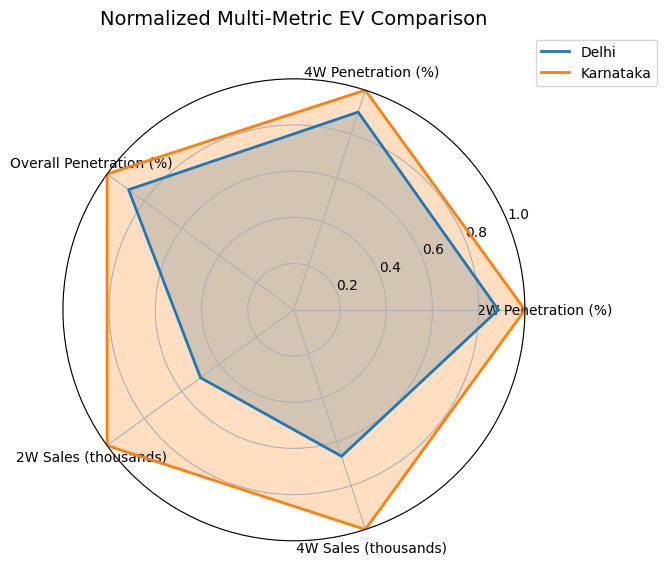

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual numbers)
data = {
    "Metric": ["2W Penetration (%)", "4W Penetration (%)", "Overall Penetration (%)",
               "2W Sales (thousands)", "4W Sales (thousands)"],
    "Delhi": [6.98, 4.5, 6.98, 80, 20],
    "Karnataka": [7.89, 5.0, 7.89, 160, 30]
}

df = pd.DataFrame(data)

# Normalize each metric to 0–1 scale
df_norm = df.copy()
df_norm["Delhi"] = df["Delhi"] / df[["Delhi", "Karnataka"]].max(axis=1)
df_norm["Karnataka"] = df["Karnataka"] / df[["Delhi", "Karnataka"]].max(axis=1)

# Prepare for radar chart
categories = list(df_norm["Metric"])
N = len(categories)

# Repeat first value to close the radar chart
values_delhi = df_norm["Delhi"].tolist() + [df_norm["Delhi"].tolist()[0]]
values_karnataka = df_norm["Karnataka"].tolist() + [df_norm["Karnataka"].tolist()[0]]

angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values_delhi, linewidth=2, linestyle='solid', label="Delhi")
ax.fill(angles, values_delhi, alpha=0.25)

ax.plot(angles, values_karnataka, linewidth=2, linestyle='solid', label="Karnataka")
ax.fill(angles, values_karnataka, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)

# Set radial scale 0–1 since normalized
ax.set_ylim(0, 1)

plt.title("Normalized Multi-Metric EV Comparison", size=14, y=1.1)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()
